### CA1 – Machine Learning HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CristhianMacedo2024104/Machine-Learning)

## Introdution 

This project aims to complete the first Assessment Task for the module Machine Learning from the course Higher Diploma in Science in Data Analytics for Business by CCT College Dublin, this is a document to describe the project itself whose name is “CristhianMacedo_MLearningHDip_CA1.ipynb” and should be always with this document. This project for Machine Learning uses the programming language Python, the environment of Anaconda Navigator with Jupyter Notebook,  with CRISP-DM methodology as project management. 

Over the years everything started to change some things for good and others not as much, and this situation is one case, about house prices, as a resident of Ireland who pays rent, and dreams of buying a house in the future, it is an interesting way of learning and predicting some house prices around the region



Therefore the area chosen to be covered here is Housing and Zoning and it will address an Exploratory Data Analysis, with some statistics analyses focused on developing and deploying Machine Learning to predict price

s.
Once the data is small and contains a few features there is no need to use feature reduction algorithms such as Principal Component Analysis (PCA), but it will be analysed using KNN Classification, Random Forest, Decision Trees, Linear Regression, K-Means and some analyses using Cross-Validation and GridSearchCV to find optimal paramete

rs.
After some research on the website Central Statistics Office, Ireland (cso.ie) it was found interesting data about Residential Property until January 2024, “HPM04 Market-based Household Purchases of Residential Dwellings” (Central Statistics Office, 20

24).
This database contains some data about “Market-based Household Purchases of Residential Dwellings by Dwelling Status, Eircode Output, Stamp Duty Event, Type of Buyer, Month (2010 January - 2024 January)” (Central Statistics Office, 2024), and is updating month by month. For this project, it was chosen the data about Mean Sale Price in Euro, All dwelling statuses, stamp duty events: Executions, months from 2010 January to 2024 January, all Eircode output from the counties of Ireland and type of buyer just the First-Time buyer owner-occupier.


## 1. Data Understanding

### 1.1 Importing libraries

Importing the required libraries "`pandas`" to start the project.

Also importing "`numpy`", "`seaborn`" and "`matplotlib.pyplot`", in case it needs other libraries it will be imported when necessary it comes.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

### 1.2	Loading Data from a CSV File

Loading the dataset using the function “`.read_csv`” to import the required data existing in the Comma-separated values "`.csv`" file in the `df` variable.

In [2]:
df = pd.read_csv("HPM04.20240416T220418.csv")

### 1.3	Inspecting the Data Set

The first command useful to start understanding the data is “`.head()`” to check the first 5 observations as default and features contained in the data frame after loaded. 

This command was important and necessary to get the first impression of it, returning that this dataset has **n** rows (observations) and **8** columns (features).

In [3]:
df.head(2)

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN


Thereafter using the command “`shape`” shows us the complete body of the data, in this case **23491** observations and **8** features to be analysed.

In [4]:
df.shape

(23491, 8)

Used “```.info()```” next to Print a concise summary of a DataFrame. Getting this information it was necessary to learn the names of features existing and the difference between the total of observations shown before in the “`shape`” command and their respective data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23491 entries, 0 to 23490
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Statistic Label   23491 non-null  object 
 1   Month             23491 non-null  object 
 2   Dwelling Status   23491 non-null  object 
 3   Eircode Output    23491 non-null  object 
 4   Stamp Duty Event  23491 non-null  object 
 5   Type of Buyer     23491 non-null  object 
 6   UNIT              23491 non-null  object 
 7   VALUE             20302 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.4+ MB


The "`.describe()`" function shows us a little more about each feature, we can see statistics information about: count, mean, standard deviation, min, Q1 25%, Q2 50%, Q3 75% and max 

In [6]:
df.describe()

,VALUE
count,2.030200e+04
mean,2.313803e+05
std,1.186008e+05
min,2.500000e+04
25%,1.481902e+05
50%,2.066660e+05
75%,2.900000e+05
max,1.350000e+06


Left a commented code below if wanted to see a good Profile Report about the data set itself with an overview, alert and reproduction of it, containing information about EDA, if there are or not missing cells, duplicated rows, variable types, Mean, Max, Min, Negative and Zero values, memory size and so on, graphics of the distribution, the command “pip install ydata-profiling” is required to use this.

In [7]:
# pip install ydata-profiling

In [8]:
# from ydata_profiling import ProfileReport

# ProfileReport(df)

### 1.4 Checking types of data

Using "`df.dtypes`" it is possible to get information on each feature and check their respective data types if are correct, make sense or not, comparing with the "`.head()`" command and the dictionary of the data.

In [9]:
df.dtypes

Statistic Label      object
Month                object
Dwelling Status      object
Eircode Output       object
Stamp Duty Event     object
Type of Buyer        object
UNIT                 object
VALUE               float64
dtype: object

After using "`.unique()`" for shows the unique content in the specific feature, and allow us to check if there are any divergence of the values.

In [10]:
df['Type of Buyer'].unique()

array(['Household Buyer - First-Time Buyer Owner-Occupier'], dtype=object)

## 2. Data Preparation

### 2.1 Finding Unique Values

Checking the name of the features using the command "`.columns`"

In [11]:
df.columns

Index(['Statistic Label', 'Month', 'Dwelling Status', 'Eircode Output',
       'Stamp Duty Event', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

Used the method "`.value_counts()`" to "Return a Series containing the frequency of each distinct row in the Dataframe." (The Pandas Development Team, 2024b), it was helpful to use in classification features to understand better what it was going on.

In [12]:
df["UNIT"].value_counts()

UNIT
Euro    23491
Name: count, dtype: int64

Next using the command “`.isnull().sum()`” to get the amount of any missing values existent. In this case the features: In this case just the feature: `VALUE`

In [13]:
df.isnull().sum()

Statistic Label        0
Month                  0
Dwelling Status        0
Eircode Output         0
Stamp Duty Event       0
Type of Buyer          0
UNIT                   0
VALUE               3189
dtype: int64

Next getting the percentage of missing values using the method Mean. In this case, Values are missing approximately 14% of 100% values.

In [14]:
df.isnull().mean() * 100

Statistic Label      0.000000
Month                0.000000
Dwelling Status      0.000000
Eircode Output       0.000000
Stamp Duty Event     0.000000
Type of Buyer        0.000000
UNIT                 0.000000
VALUE               13.575412
dtype: float64

Below it was used in a matrix graphic imported from missingno library that shows us the features missing values

In [15]:
# pip install missingno

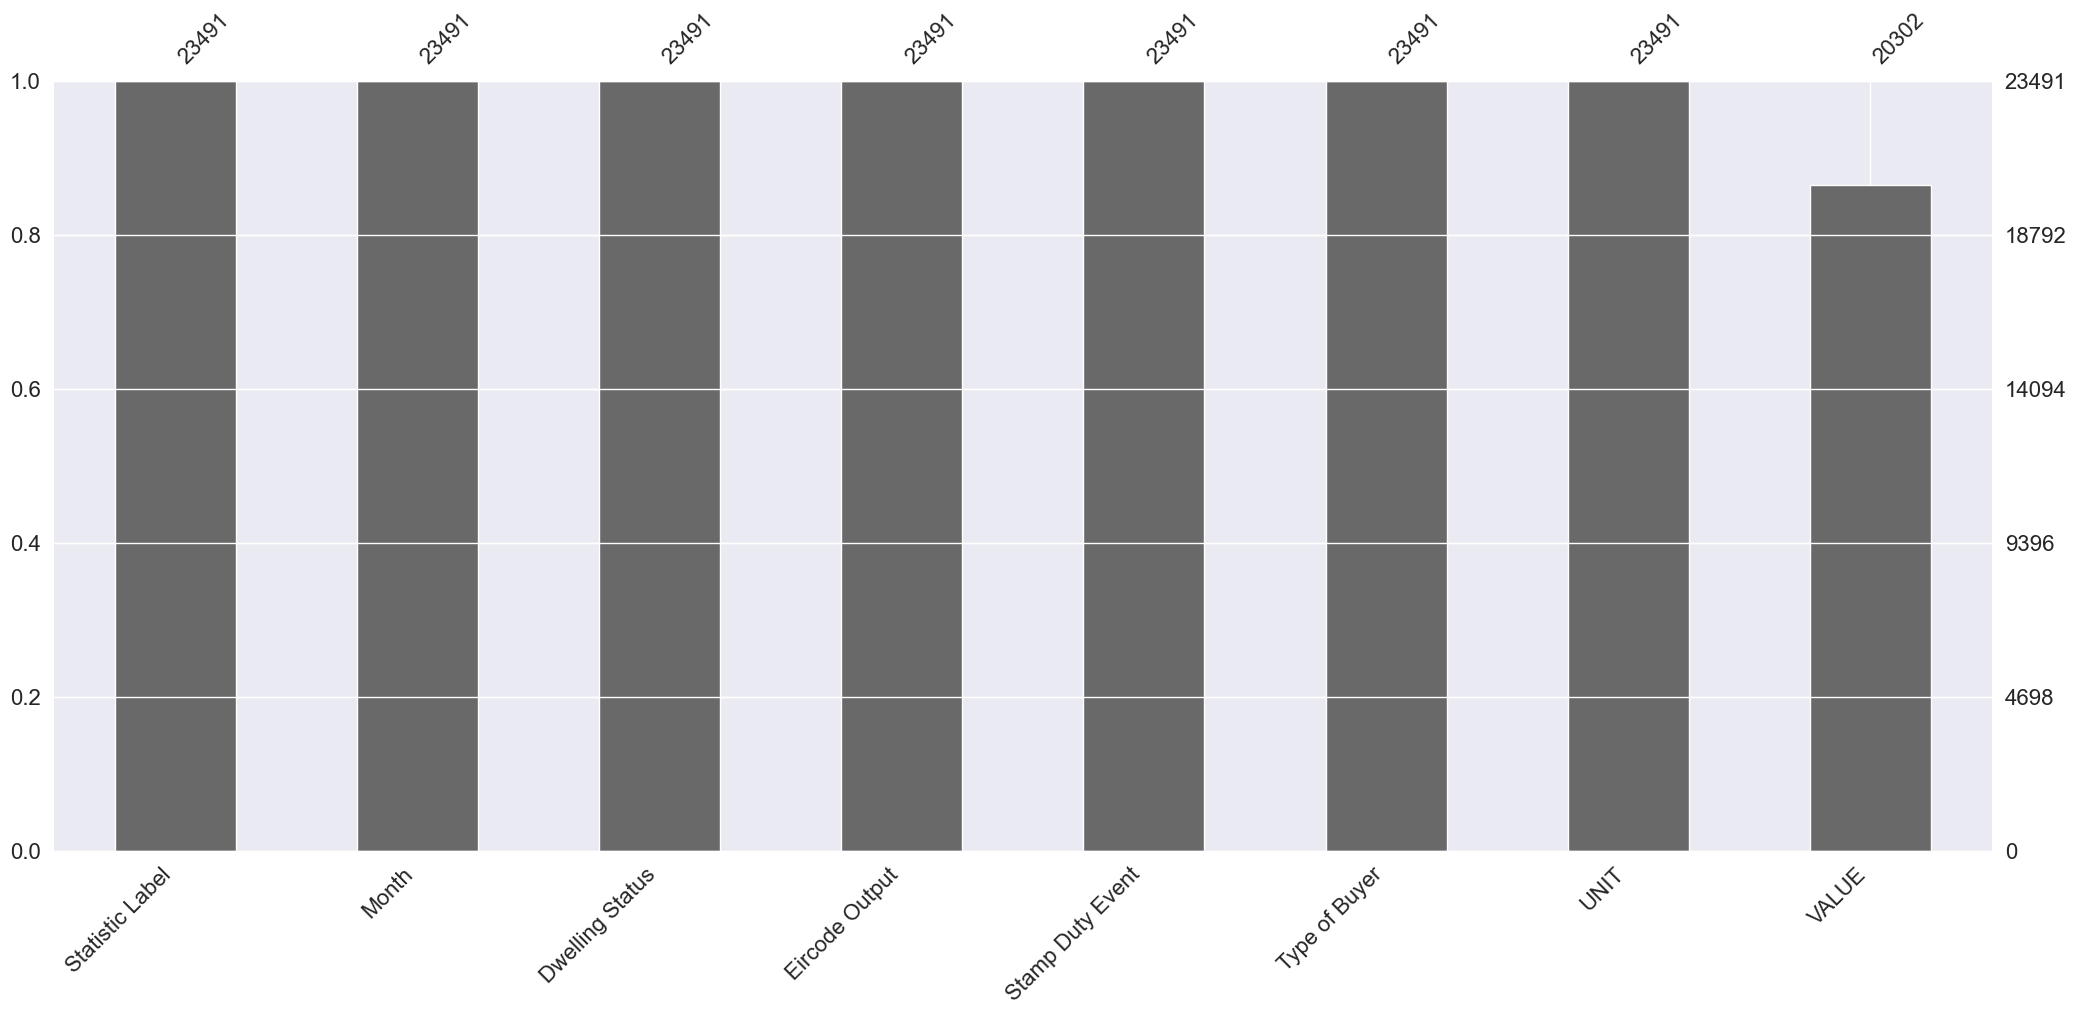

In [16]:
import missingno as msno
ax = msno.bar(df.sample(23491))

### 2.2 Replacing Values (Syntax errors)

Checking the data frame using "`.head()`"

In [17]:
df.head()

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
2,Mean Sale Price,2010 January,All Dwelling Statuses,A45: Oldtown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,322422.0
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,343425.0


Until now, it has not found any syntax error or divergence between the features, if needed will be dealt with.

The feature `Eircode Output` will be `split` into two parts when the algorithm finds the symbol `:` turn one feature the Acronym of the place and the second one County's name. Learned how to "Split strings around given separator/delimiter." (The Pandas Development Team, 2024c). 

Using the split of strings to divide into two columns the values in `Eircode Output` feature and saved in the news features whose names are "`Acronym`" and "`County`".

In [18]:
df[["Acronym", "County"]] = df['Eircode Output'].str.rsplit(":", n = 1, expand = True)

In [19]:
df.head(2)

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE,Acronym,County
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN,A41,Ballyboughal
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN,A42,Garristown


### 2.3 Dropping Irrelevant Columns

After analyses opted to delete the features: 'Statistic Label', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer' and 'UNIT'.

In [20]:
df.columns

Index(['Statistic Label', 'Month', 'Dwelling Status', 'Eircode Output',
       'Stamp Duty Event', 'Type of Buyer', 'UNIT', 'VALUE', 'Acronym',
       'County'],
      dtype='object')

In [21]:
df = df.drop(columns = ['Statistic Label', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer', 'UNIT'])

In [22]:
df.head(2)

,Month,Eircode Output,VALUE,Acronym,County
0,2010 January,A41: Ballyboughal,NaN,A41,Ballyboughal
1,2010 January,A42: Garristown,NaN,A42,Garristown


### 2.4 Renaming Columns

Renaming the features: Eircode Output to Eircode and VALUE to Value

In [23]:
df.columns

Index(['Month', 'Eircode Output', 'VALUE', 'Acronym', 'County'], dtype='object')

In [24]:
df = df.rename(columns= {'Eircode Output': 'Eircode', 'VALUE': 'Value'})

In [25]:
df.head(2)

,Month,Eircode,Value,Acronym,County
0,2010 January,A41: Ballyboughal,NaN,A41,Ballyboughal
1,2010 January,A42: Garristown,NaN,A42,Garristown


### 2.5 Handling Missing Values

Creating a variable whose name is "`missing_value_formats`" to save some different characters and input in the dataset to patronize all of them as NaN to be easy to handle next.  

In [26]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--", "-", "?", "UnKnown", "Unknown", "Na", "Nan"]
df.replace(missing_value_formats, np.nan, inplace = True)

Using the function `.isna()` from `pandas.DataFrame.isna` to "Return a boolean same-sized object indicating if the values are NA." (The Pandas Development Team, 2024a) and next using shape in `.isna()` and `df`

In [27]:
df[df['Value'].isna()]

,Month,Eircode,Value,Acronym,County
0,2010 January,A41: Ballyboughal,NaN,A41,Ballyboughal
1,2010 January,A42: Garristown,NaN,A42,Garristown
2,2010 January,A45: Oldtown,NaN,A45,Oldtown
10,2010 January,A85: Dunshaughlin,NaN,A85,Dunshaughlin
27,2010 January,D10: Dublin 10,NaN,D10,Dublin 10
...,...,...,...,...,...
23451,2024 January,P75: Bantry,NaN,P75,Bantry
23455,2024 January,R21: Mhuine Bheag,NaN,R21,Mhuine Bheag
23471,2024 January,V23: Caherciveen,NaN,V23,Caherciveen
23484,2024 January,X42: Kilmacthomas,NaN,X42,Kilmacthomas


In [28]:
df[df['Value'].isna()].shape, df.shape

((3189, 5), (23491, 5))

There are 3189 observations missing values from the total 23491 with 13.57% of 100% 

In [29]:
print("Percentage of Missing Values in Value Feature: {}".format((3189/23491) * 100))

Percentage of Missing Values in Value Feature: 13.575411859861223


### 2.6 Imputing Missing Values

It could have opted to use the code "`df = df.dropna(axis = 0)`" to drop all observations with missing values once there is not as much lost percentage, but in this case, it will use an approach such as getting the mean values, or median values, filling by the top or down and so on to imputing those missing values.

#### 2.6.1 Creating a Hypothesis from a New Column

Before to fill the missing values it will create another feature at the end of the data frame whose name will be `Sold`. 

Let's assume that there are no values in these observations because the properties were sold and after sold they can no longer present values as they are private data.

Opted to do this, once the data frame is there are not many features to be analysed and used this new column will be useful to use next in machine learning algorithms.

To finally get the results below it was necessary to learn two things: First, how to use if and else conditions with the `.apply()` class, learned how to use after reading "5 ways to apply an IF condition in Pandas DataFrame" (Data to Fish, 2024) from datatofish.com website, and second for the condition Pandas documentation, using `pandas.isnull` "Detect missing values for an array-like object" (The Pandas Development Team, 2024c).

In [30]:
df['Sold'] = df['Value'].apply(lambda x: 1 if pd.isna(x) else 0)

In [31]:
df.head()

,Month,Eircode,Value,Acronym,County,Sold
0,2010 January,A41: Ballyboughal,NaN,A41,Ballyboughal,1
1,2010 January,A42: Garristown,NaN,A42,Garristown,1
2,2010 January,A45: Oldtown,NaN,A45,Oldtown,1
3,2010 January,A63: Greystones,322422.0,A63,Greystones,0
4,2010 January,A67: Wicklow,343425.0,A67,Wicklow,0


#### 2.6.2 Creating a Second Hypothesis in a New Column

Another approach is to created a new feature whose name is `Dublin` with a value 1 if the County is Dublin and 0 if not. 

Learned how to use `.str.contains()` in an example of the www.geeksforgeeks.org website. In this case, it is "Using the contains() function of strings to filter the rows" to find just the observations that contains Dunlin in the name. (Sanchhaya Education Private Limited, 2021).

In [32]:
df[df['County'].str.contains('Dublin')]

,Month,Eircode,Value,Acronym,County,Sold
18,2010 January,D01: Dublin 1,212500.0,D01,Dublin 1,0
19,2010 January,D02: Dublin 2,232688.0,D02,Dublin 2,0
20,2010 January,D03: Dublin 3,344300.0,D03,Dublin 3,0
21,2010 January,D04: Dublin 4,372500.0,D04,Dublin 4,0
22,2010 January,D05: Dublin 5,291000.0,D05,Dublin 5,0
...,...,...,...,...,...,...
23387,2024 January,D18: Dublin 18,548727.0,D18,Dublin 18,0
23388,2024 January,D20: Dublin 20,368400.0,D20,Dublin 20,0
23389,2024 January,D22: Dublin 22,502539.0,D22,Dublin 22,0
23390,2024 January,D24: Dublin 24,377731.0,D24,Dublin 24,0


Getting all unique names in County that contains Dublin

In [33]:
df['County'][df['County'].str.contains('Dublin')].unique()

array([' Dublin 1', ' Dublin 2', ' Dublin 3', ' Dublin 4', ' Dublin 5',
       ' Dublin 6', ' Dublin 7', ' Dublin 8', ' Dublin 9', ' Dublin 10',
       ' Dublin 11', ' Dublin 12', ' Dublin 13', ' Dublin 14',
       ' Dublin 15', ' Dublin 16', ' Dublin 17', ' Dublin 18',
       ' Dublin 20', ' Dublin 22', ' Dublin 24', ' Dublin 6W'],
      dtype=object)

Creating a new feature '`Dublin`' and save with 1 if the place is Dublin 

In [34]:
df['Dublin'] = np.where(df['County'].str.contains('Dublin') == True, 1, 0)

In [35]:
df[df['County'].str.contains('Dublin')]

,Month,Eircode,Value,Acronym,County,Sold,Dublin
18,2010 January,D01: Dublin 1,212500.0,D01,Dublin 1,0,1
19,2010 January,D02: Dublin 2,232688.0,D02,Dublin 2,0,1
20,2010 January,D03: Dublin 3,344300.0,D03,Dublin 3,0,1
21,2010 January,D04: Dublin 4,372500.0,D04,Dublin 4,0,1
22,2010 January,D05: Dublin 5,291000.0,D05,Dublin 5,0,1
...,...,...,...,...,...,...,...
23387,2024 January,D18: Dublin 18,548727.0,D18,Dublin 18,0,1
23388,2024 January,D20: Dublin 20,368400.0,D20,Dublin 20,0,1
23389,2024 January,D22: Dublin 22,502539.0,D22,Dublin 22,0,1
23390,2024 January,D24: Dublin 24,377731.0,D24,Dublin 24,0,1


Using a `kdeplot` to compare the density of value from the other places in comparison to a Dublin 

<Axes: xlabel='Value', ylabel='Density'>

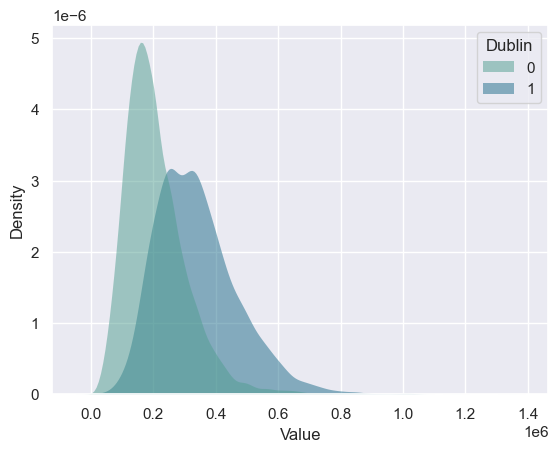

In [36]:
sns.kdeplot(
   data = df, x = "Value", hue = df['Dublin'],
   fill = True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

#### 2.6.3 Handling Missing Values

Next, in this case: `Value` feature will try to use the method .median() to fill in the NaN(s) value missing. 

After some analyses, it found that all missing values got the same value in Price, which is not expected so in this case, changed to the method `bfill` to get values from the next rows, where it works and even the distribution of the feature get better than before.

Opted to use the `bfill` approach event the Median approach, it is a better representation of the majority of the values in the variable, but not worked well in this case.

In [37]:
df['Value'] = df['Value'].fillna(df['Value'].fillna(method = 'bfill'))

In [38]:
df[df["Sold"] == 1]

,Month,Eircode,Value,Acronym,County,Sold,Dublin
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,0
2,2010 January,A45: Oldtown,322422.0,A45,Oldtown,1,0
10,2010 January,A85: Dunshaughlin,180355.0,A85,Dunshaughlin,1,0
27,2010 January,D10: Dublin 10,213067.0,D10,Dublin 10,1,1
...,...,...,...,...,...,...,...
23451,2024 January,P75: Bantry,187000.0,P75,Bantry,1,0
23455,2024 January,R21: Mhuine Bheag,274212.0,R21,Mhuine Bheag,1,0
23471,2024 January,V23: Caherciveen,310000.0,V23,Caherciveen,1,0
23484,2024 January,X42: Kilmacthomas,257835.0,X42,Kilmacthomas,1,0


In [39]:
df.head()

,Month,Eircode,Value,Acronym,County,Sold,Dublin
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,0
2,2010 January,A45: Oldtown,322422.0,A45,Oldtown,1,0
3,2010 January,A63: Greystones,322422.0,A63,Greystones,0,0
4,2010 January,A67: Wicklow,343425.0,A67,Wicklow,0,0


Checked once again if worked with a graphic and the command “`.isnull().sum()`”.

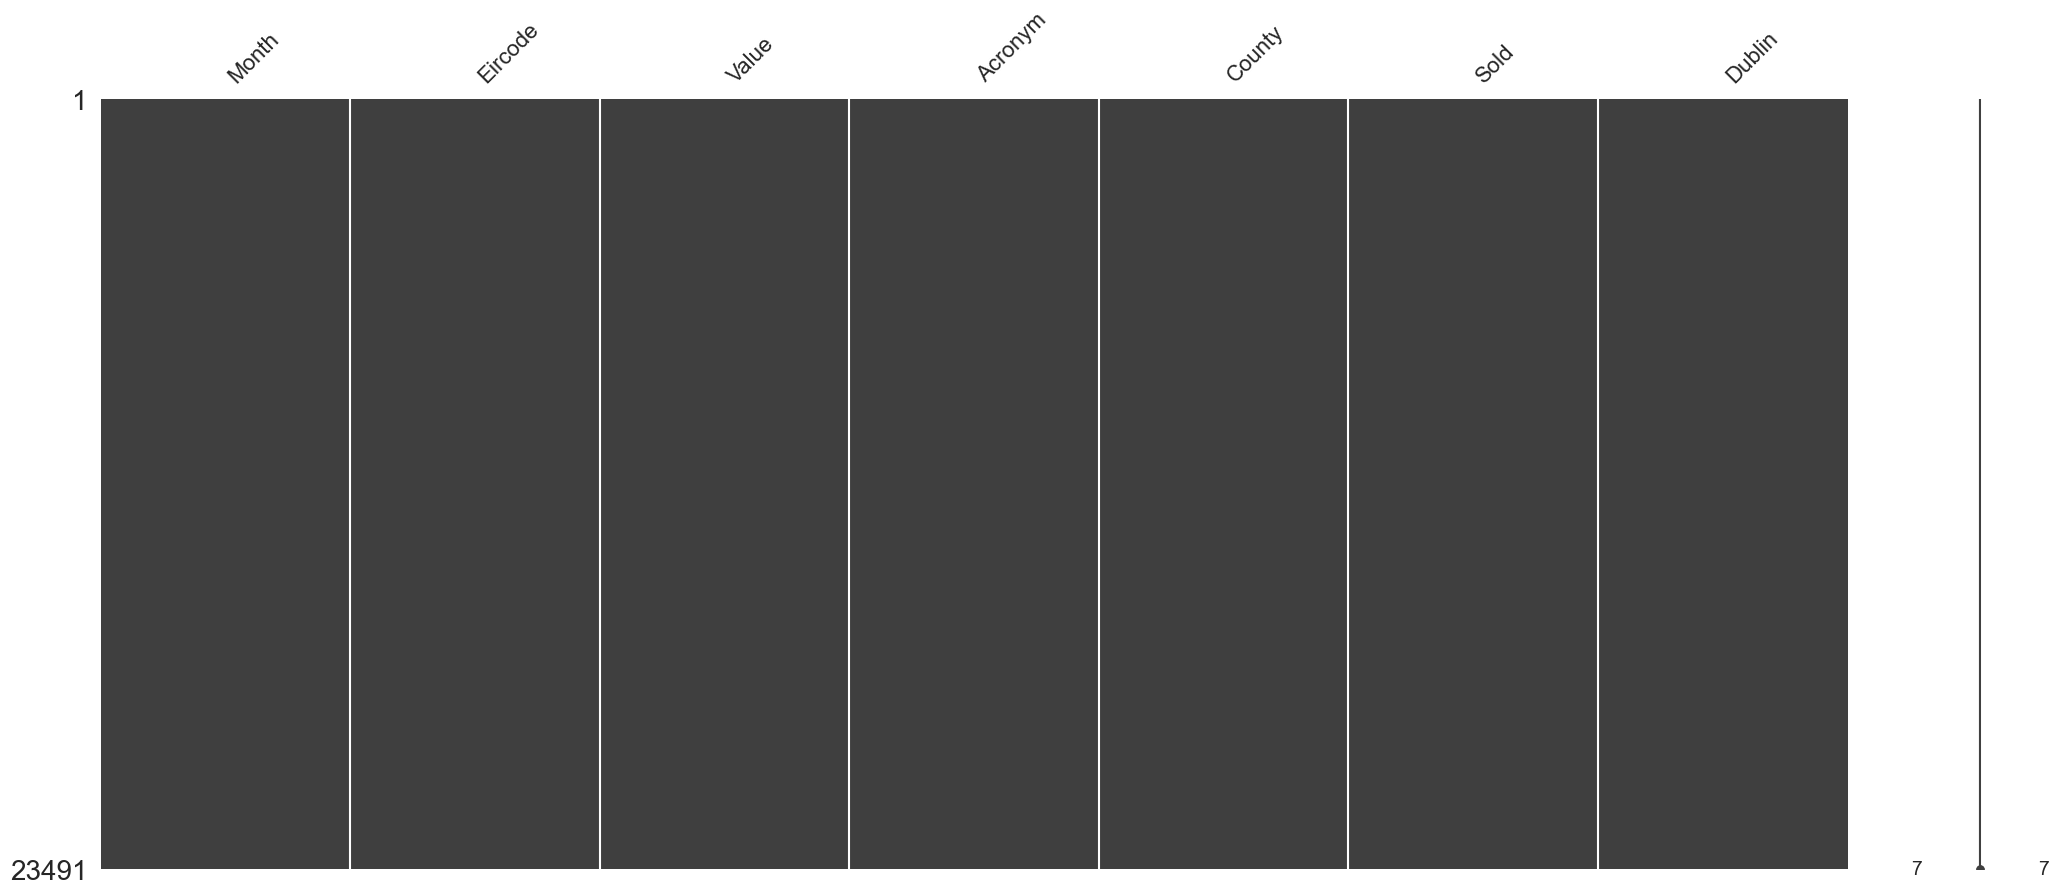

In [40]:
ax = msno.matrix(df.sample(23491))

In [41]:
df.isnull().sum()

Month      0
Eircode    0
Value      0
Acronym    0
County     0
Sold       0
Dublin     0
dtype: int64

In [42]:
df[df['Value'].isnull()].head()

,Month,Eircode,Value,Acronym,County,Sold,Dublin


### 2.7 Handling Duplicate Rows

Checked if there exist duplicate observations, in this case, there are none to be handled.

In [43]:
df[df.duplicated()].shape

(0, 7)

In [44]:
df.count()

Month      23491
Eircode    23491
Value      23491
Acronym    23491
County     23491
Sold       23491
Dublin     23491
dtype: int64

### 2.8 Type Conversion

Checking with `dtypes` all features to check the data types also seeing with `.head()`, and there are no features to be converted, but in case it is needed it will use the command “.astype()” to fix it.

In [45]:
df.dtypes

Month       object
Eircode     object
Value      float64
Acronym     object
County      object
Sold         int64
Dublin       int64
dtype: object

In [46]:
df.head(2)

,Month,Eircode,Value,Acronym,County,Sold,Dublin
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,0


### 2.9 Relationships

There are not many numerical features in the data set, but if had could be analysed the relationships between the numerical feature with the codes below, creating a new data frame whose name is "`df_numeric`" and getting just numeric columns from "`df`" data frame, after using the algorithm “`.corr`” in the "`df_numeric.corr()`" to save the correlations in a new variable "`correlation_matrix`" to show the correlation matrix and check the relations between them using a heatmap.

,Value,Sold,Dublin
Value,1.000000,-0.090497,0.411443
Sold,-0.090497,1.000000,-0.148026
Dublin,0.411443,-0.148026,1.000000


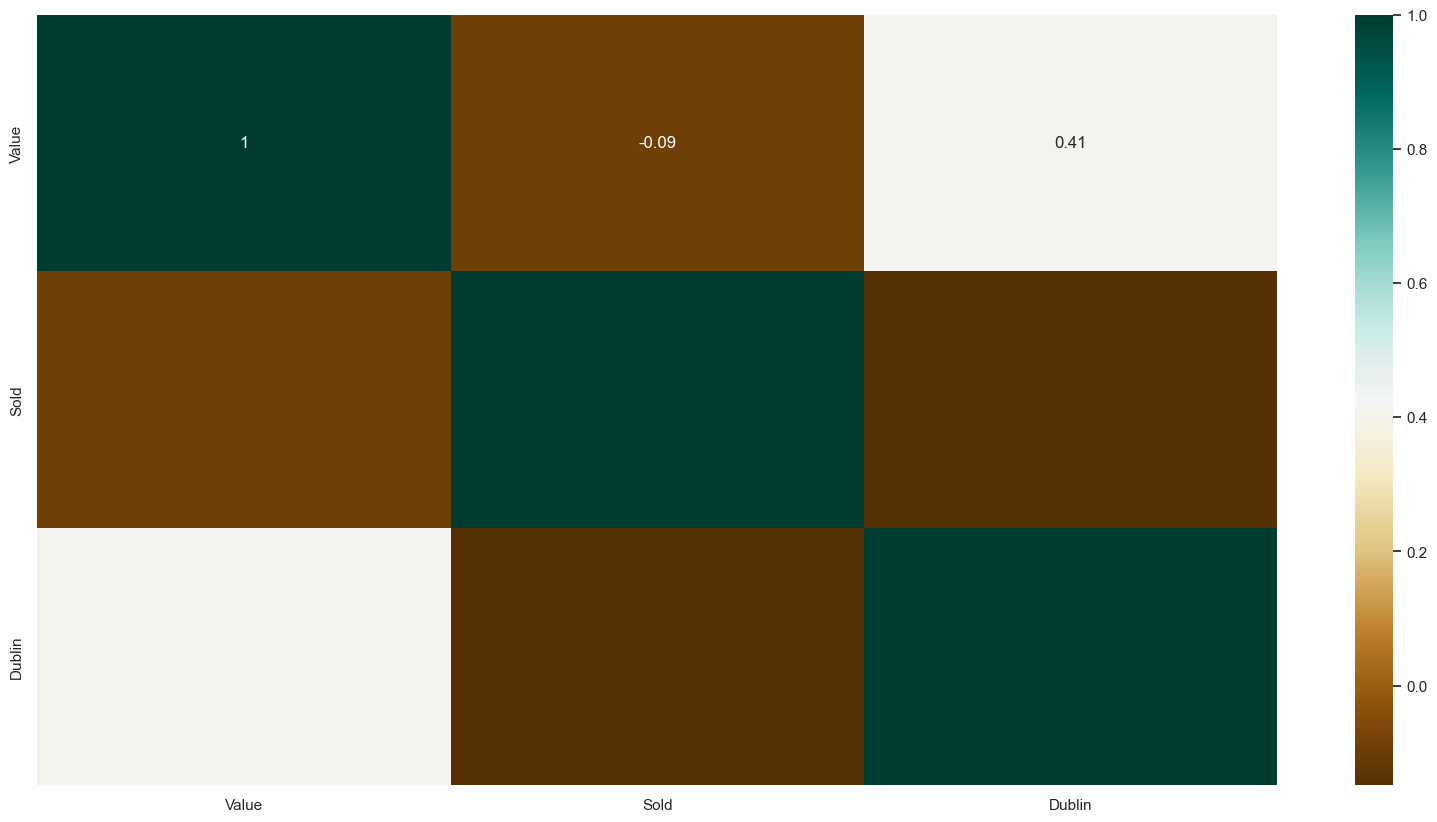

In [47]:
df_numeric = df.select_dtypes(include = ['number'])

plt.figure(figsize = (20, 10))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

Below is an example of the density of Value feature using KDE plot.

<Axes: xlabel='Value', ylabel='Density'>

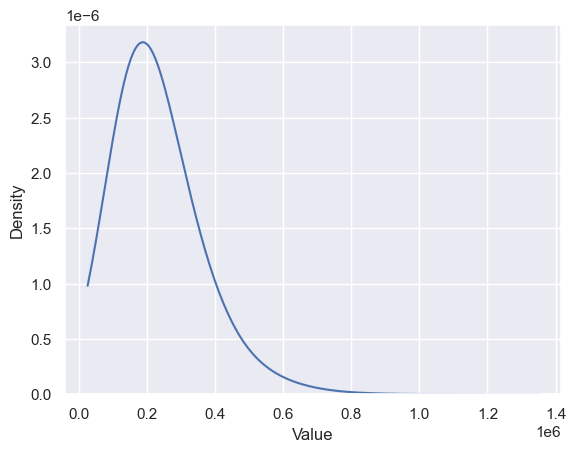

In [48]:
sns.kdeplot(data = df, x = "Value", bw_adjust = 5, cut = 0)

### 2.10 Statistical Analysis

As said before there are not many numerical features in the data set, but below there is an example to create a pair plot to visualise all the features and their respective signals.
In this case left just the feature `Value` to visualisation.

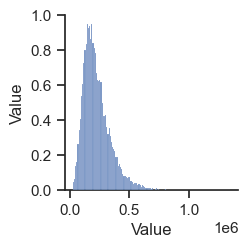

In [49]:
sns.set_theme(style = "ticks")
sns.pairplot(df[['Value']])

Next, it was created a histogram using the graphic “`.displot`” from the library seaborn to check the distribution of `Value` feature of the Country of Ireland. 

The examples below will be refined with a mark to show us the mean and median on the graphic, the example got from the GitHub Gist using the command "`.axvline`" to get a "Distribution plot with mean and median" (Cereniyim, 2019), also checked about the parameters on matplotlib website for "Add a vertical line across the Axes" (The Matplotlib Development Team, 2024).

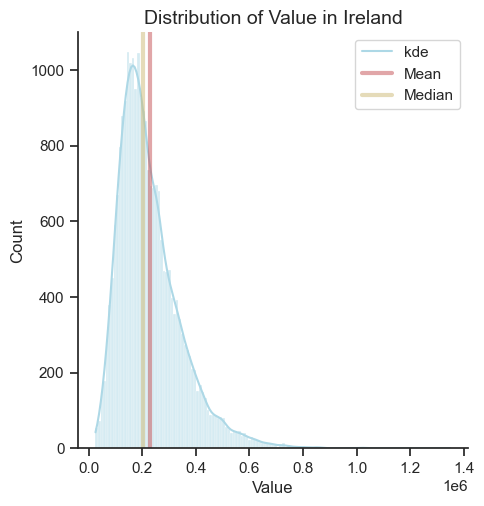

Mean: 227192.43, Median: 202125.00
Standard Deviation: 116763.18


In [50]:
sns.displot(df["Value"], color = "lightblue", kde = True)
plt.axvline(df["Value"].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
plt.axvline(df["Value"].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
plt.title("Distribution of Value in Ireland", size = 14)
plt.legend(["kde", "Mean", "Median"])
plt.show()

print('Mean: {:.2f}, Median: {:.2f}'.format(df['Value'].mean(), df['Value'].median()))
print('Standard Deviation: {:.2f}'.format(df['Value'].std()))

**Distribution of Value:** 
The distribution is `skewed to the right side`, statistical values: Mean: **227192.43**, Median: **202125.00** and Standard Deviation: **116763.18**

Creating a variable whose name is `Dublin` to save just the places that are Dublin and using a displot next to see the distribution of the County of Dublin

In [51]:
dublin = df[df['Dublin'] == 1]

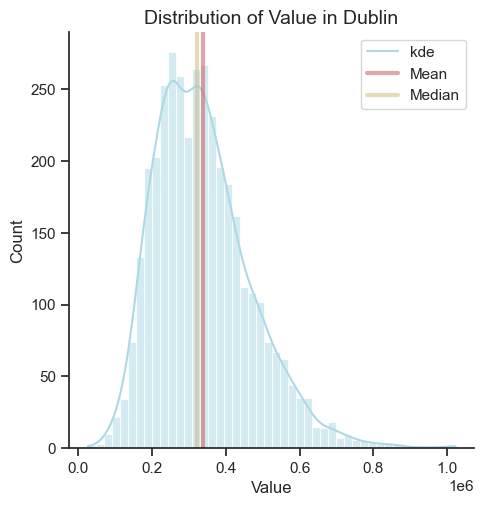

Mean: 337979.23, Median: 321634.00
Standard Deviation: 130935.86


In [52]:
sns.displot(dublin['Value'], color = "lightblue", kde = True)
plt.axvline(dublin["Value"].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
plt.axvline(dublin["Value"].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
plt.title("Distribution of Value in Dublin", size = 14)
plt.legend(["kde", "Mean", "Median"])
plt.show()

print('Mean: {:.2f}, Median: {:.2f}'.format(dublin['Value'].mean(), dublin['Value'].median()))
print('Standard Deviation: {:.2f}'.format(dublin['Value'].std()))

**Distribution of Value:** 
The distribution is `skewed to the right side`, statistical values: Mean: **337979.23**, Median: **321634.00** and Standard Deviation: **130935.86**

Next, create a boxplot to check all features and their respective outliers.

<Axes: >

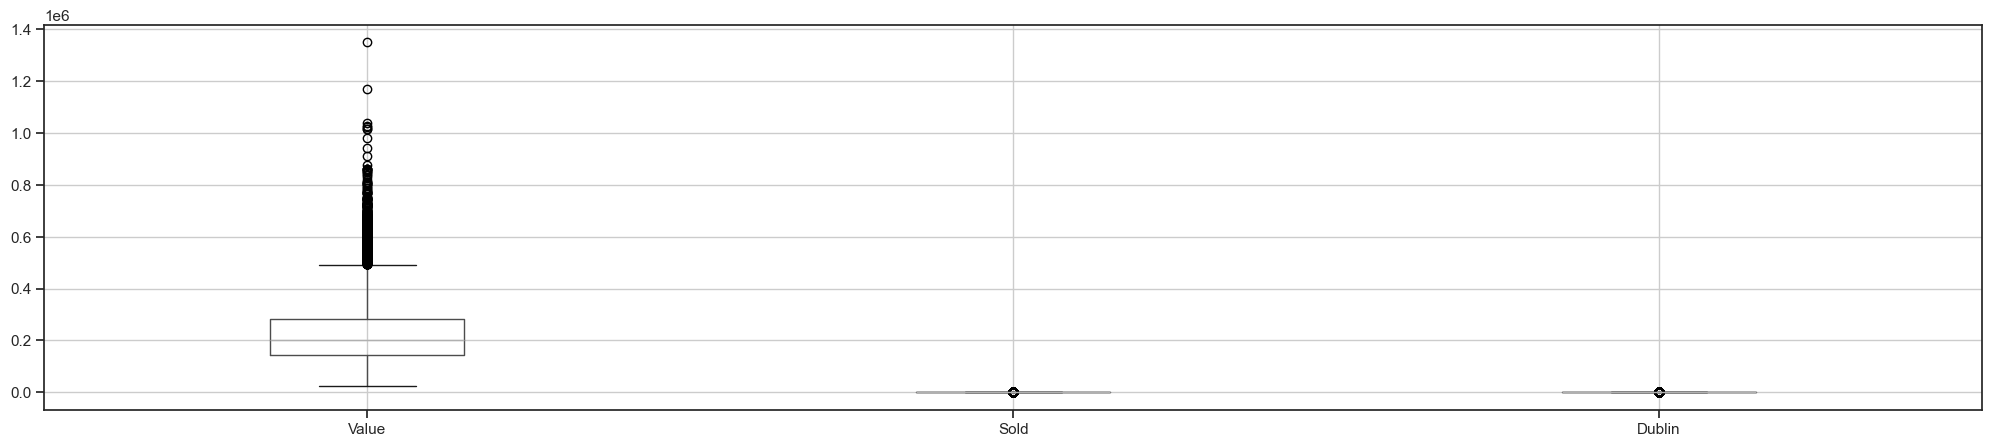

In [53]:
df.boxplot(figsize = (25, 5))

Below are created some code lines about statistics from the feature Value as a test and after using the “.describe” to check the values.

1. Mean: `numpy.mean` from numpy.org
2. Median: `numpy.median` from numpy.org
3. Mode: `pandas.DataFrame.mode` from pandas.pydata.org
4. Range: `numpy.max` minus `numpy.min` from numpy.org
5. Standard Deviation: `numpy.std` from numpy.org
6. Variance: `numpy.var` from numpy.org
7. Interquartile Range (IQR): `numpy.percentile` 75% - `numpy.percentile` 25% from numpy.org
8. Percentile 25%: `numpy.percentile`  from numpy.org
9. Percentile 50%: `numpy.percentile`  from numpy.org
10. Percentile 75%: `numpy.percentile`  from numpy.org
11. Coefficient of Variation (CV): `numpy.std` divided by `numpy.mean` multiple by 100 from numpy.org

In [54]:
print("Mean: {:.2f}".format(np.mean(df["Value"])))
print("Median: {:.2f}".format(np.median(df["Value"])))
print("Mode(s): {:.2f}".format(df["Value"].mode()[0]))
print("Range: {:.2f}".format(np.max(df["Value"]) - np.min(df["Value"])))
print("Standard Deviation: {:.2f}".format(np.std(df["Value"])))
print("Variance: {:.2f}".format(np.var(df["Value"])))
print("Interquartile Range (IQR): {:.2f}".format(np.percentile(df["Value"], 75) - np.percentile(df["Value"], 25)))
print("Percentile 25%: {:.2f}".format(np.percentile(df["Value"], 25)))
print("Percentile 50%: {:.2f}".format(np.percentile(df["Value"], 50)))
print("Percentile 75%: {:.2f}".format(np.percentile(df["Value"], 75)))
print("Coefficient of Variation (CV): {:.2f}".format(np.std(df["Value"]) / np.mean(df["Value"]) * 100))

Mean: 227192.43
Median: 202125.00
Mode(s): 150000.00
Range: 1325000.00
Standard Deviation: 116760.70
Variance: 13633060803.75
Interquartile Range (IQR): 139091.50
Percentile 25%: 145069.50
Percentile 50%: 202125.00
Percentile 75%: 284161.00
Coefficient of Variation (CV): 51.39


In [55]:
df["Value"].describe().round(2)

count      23491.00
mean      227192.43
std       116763.18
min        25000.00
25%       145069.50
50%       202125.00
75%       284161.00
max      1350000.00
Name: Value, dtype: float64

Below are the statistics from the feature Value just for the County of Dublin.

In [56]:
print("Mean: {:.2f}".format(np.mean(dublin["Value"])))
print("Median: {:.2f}".format(np.median(dublin["Value"])))
print("Mode(s): {:.2f}".format(dublin["Value"].mode()[0]))
print("Range: {:.2f}".format(np.max(dublin["Value"]) - np.min(dublin["Value"])))
print("Standard Deviation: {:.2f}".format(np.std(dublin["Value"])))
print("Variance: {:.2f}".format(np.var(dublin["Value"])))
print("Interquartile Range (IQR): {:.2f}".format(np.percentile(dublin["Value"], 75) - np.percentile(dublin["Value"], 25)))
print("Percentile 25%: {:.2f}".format(np.percentile(dublin["Value"], 25)))
print("Percentile 50%: {:.2f}".format(np.percentile(dublin["Value"], 50)))
print("Percentile 75%: {:.2f}".format(np.percentile(dublin["Value"], 75)))
print("Coefficient of Variation (CV): {:.2f}".format(np.std(dublin["Value"]) / np.mean(dublin["Value"]) * 100))

Mean: 337979.23
Median: 321634.00
Mode(s): 215000.00
Range: 998200.00
Standard Deviation: 130918.25
Variance: 17139587985.40
Interquartile Range (IQR): 169187.00
Percentile 25%: 242292.25
Percentile 50%: 321634.00
Percentile 75%: 411479.25
Coefficient of Variation (CV): 38.74


Using a histplot to check the Frequency of Properties in Dublin per Neighborhood, in this case, all of the Neighborhood places have 169 each.

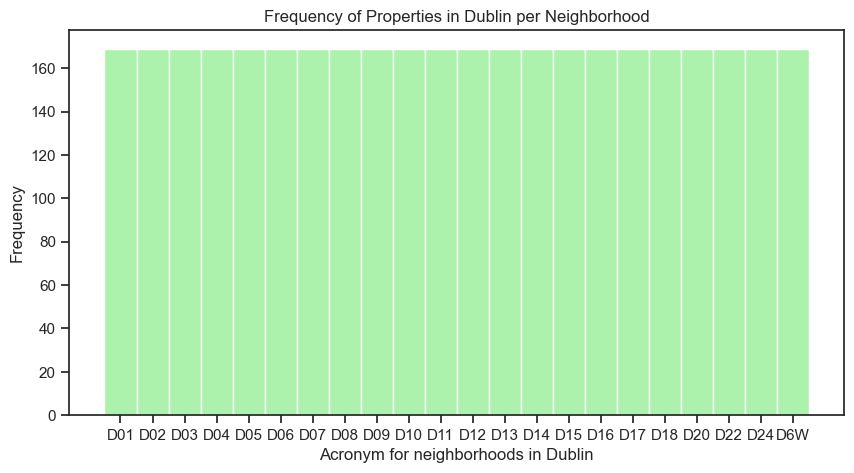

In [57]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dublin, x = 'Acronym', color = 'lightgreen')
plt.title("Frequency of Properties in Dublin per Neighborhood")
plt.xlabel('Acronym for neighborhoods in Dublin');
plt.ylabel('Frequency')
plt.show()

### 2.11 OrdinalEncoder

Creating a new feature whose name is `County_encoder` just to save the encoded values in a new feature and not lose the original one.

In [58]:
df.head()

,Month,Eircode,Value,Acronym,County,Sold,Dublin
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,0
2,2010 January,A45: Oldtown,322422.0,A45,Oldtown,1,0
3,2010 January,A63: Greystones,322422.0,A63,Greystones,0,0
4,2010 January,A67: Wicklow,343425.0,A67,Wicklow,0,0


Importing `OrdinalEncoder` from `sklearn` to Encoder Categorical data

In [59]:
from sklearn.preprocessing import OrdinalEncoder

Created the variable `county` to save just the specific values that exist in the `County` feature 

In [60]:
county = df['County'].unique()
county

array([' Ballyboughal', ' Garristown', ' Oldtown', ' Greystones',
       ' Wicklow', ' Castleblaney', ' Carrickmacross', ' Kells',
       ' Enfield', ' Ashbourne', ' Dunshaughlin', ' Dunboyne', ' Dundalk',
       ' Drogheda', ' Blackrock', ' Glenageary', ' Bray', ' Navan',
       ' Dublin 1', ' Dublin 2', ' Dublin 3', ' Dublin 4', ' Dublin 5',
       ' Dublin 6', ' Dublin 7', ' Dublin 8', ' Dublin 9', ' Dublin 10',
       ' Dublin 11', ' Dublin 12', ' Dublin 13', ' Dublin 14',
       ' Dublin 15', ' Dublin 16', ' Dublin 17', ' Dublin 18',
       ' Dublin 20', ' Dublin 22', ' Dublin 24', ' Dublin 6W', ' Cahir',
       ' Cashel', ' Carrick-on-Suir', ' Tipperary', ' Thurles', ' Nenagh',
       ' Roscrea', ' Clonmel', ' Claremorris', ' Castlebar', ' Ballina',
       ' Westport', ' Ballinrobe', ' Ballyhaunis', ' Roscommon',
       ' Castlerea', ' Boyle', ' Ballymote', ' Sligo', ' Letterkenny',
       ' Lifford', ' Donegal', ' Cavan', ' Belturbet', ' Cootehill',
       ' Monaghan', ' Clones'

Defined ordinal encoding and giving the specific values

In [61]:
encoder = OrdinalEncoder(categories = [county])

Transforming and copying the values from the feature `county` to the new feature `County_encoder`

In [62]:
df['County_Encoder'] = encoder.fit_transform(df[['County']])

Checking with the command "`.head()`" what the data set looks like now.

In [63]:
df.head(2)

,Month,Eircode,Value,Acronym,County,Sold,Dublin,County_Encoder
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0,0.0
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,0,1.0


### 2.12 Scaling / Transformation

Checking the `.head()` of the dataframe and analysing together with `.describe()` the min and max values. 

In [64]:
df.head()

,Month,Eircode,Value,Acronym,County,Sold,Dublin,County_Encoder
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0,0.0
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,0,1.0
2,2010 January,A45: Oldtown,322422.0,A45,Oldtown,1,0,2.0
3,2010 January,A63: Greystones,322422.0,A63,Greystones,0,0,3.0
4,2010 January,A67: Wicklow,343425.0,A67,Wicklow,0,0,4.0


In [65]:
df["Value"].describe().round(2)

count      23491.00
mean      227192.43
std       116763.18
min        25000.00
25%       145069.50
50%       202125.00
75%       284161.00
max      1350000.00
Name: Value, dtype: float64

Checking the distribution of `Value` feature using `displot`

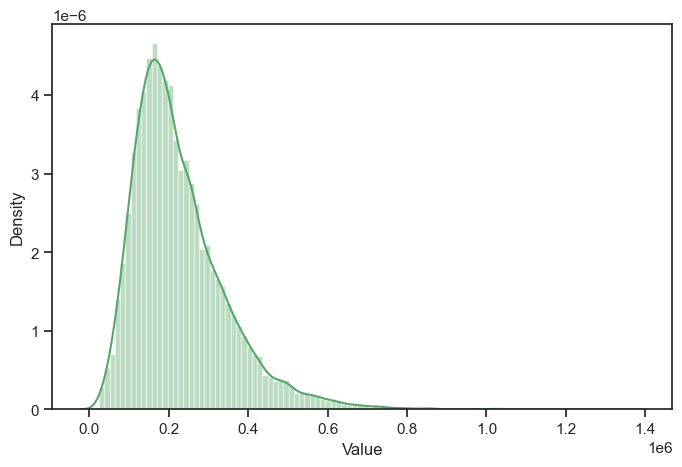

In [66]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Value'], color='g', bins=100, hist_kws = {'alpha': 0.4});

Also checking the distribution of `Value` feature using `boxplot`

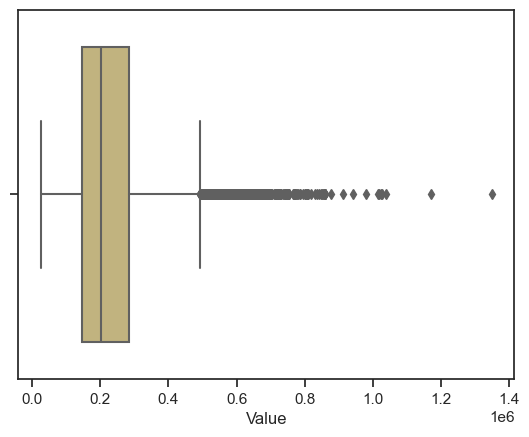

In [67]:
sns.boxplot(x = df['Value'], color="y")
plt.show()

It opted to not Scaling the original Value feature, there is no need at the moment, but in case it is needed in the future it will create a new feature whose name is `Value_scaled` to save the Feature `Value` scaled using `scale` method from preprocessing. 

In [68]:
from sklearn import preprocessing

Creating a new data frame whose name is `df_scaled` just to keep the changes after scaled

In [69]:
df_scaled = df.copy()

Creating a new feature in `df_scaled` whose name is `Value_scaled` using “`.scale`” method from `preprocessing` in `sklearn` library to scale the feature `Value`

In [70]:
df_scaled[['Value_scaled']] = preprocessing.scale(df_scaled[['Value']])

Checking the difference of `Value` from `df` Data frame and `Value_scaled` from `df_scaled` in a boxplot

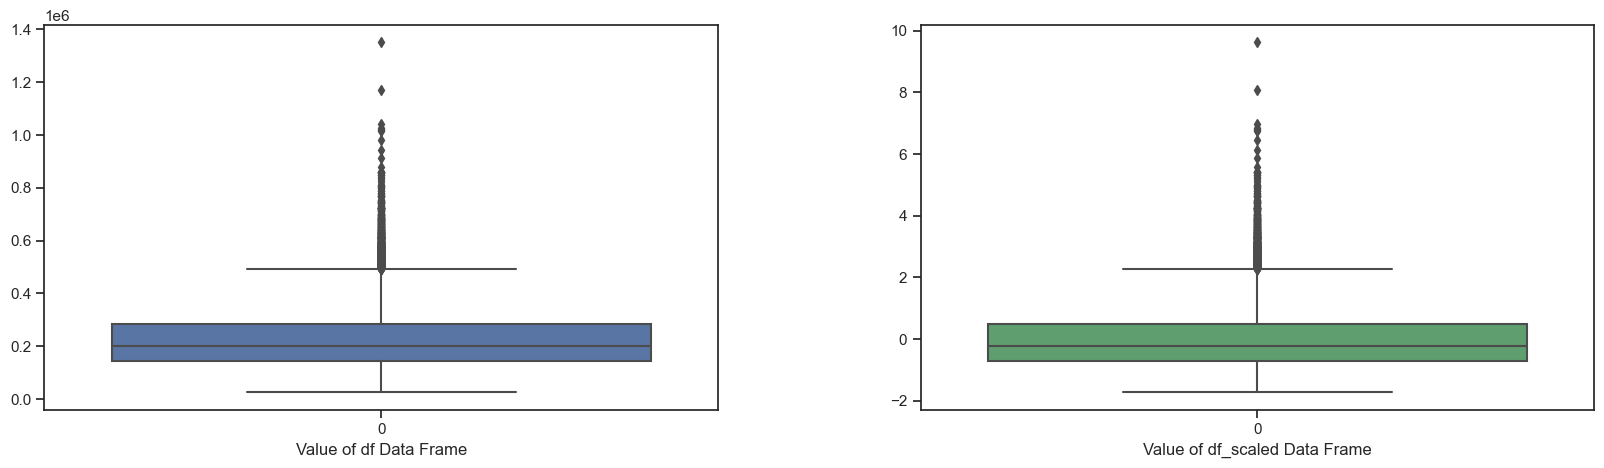

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

plt.subplots_adjust(wspace = 0.3) 

sns.boxplot(data = df['Value'], ax = ax[0], color = 'b',)
ax[0].set_xlabel('Value of df Data Frame')
 
sns.boxplot(data = df_scaled['Value_scaled'], ax = ax[1], color='g')
ax[1].set_xlabel('Value of df_scaled Data Frame')
    
plt.show()

### 2.13 Dealing Outliers

First of all, it creates a copy of each df to not miss the data until here, in case success will keep the new feature created, "`df_outliers`" from "`df_scaled`"

In [72]:
df_outliers = df_scaled.copy()

Using the IQR (Interquartile Range) Scoring technique to detect and remove any outliers. "instead look at individual features and identify extreme values in those features using interquartile range (IQR)" (Albon, 2018, p.85) in "`df_outliers`"

In [73]:
Q1 = df_outliers['Value'].quantile(0.25)
Q3 = df_outliers['Value'].quantile(0.75)
IQR = Q3 - Q1

In [74]:
df_outliers = df_outliers[~((df_outliers[['Value']] < (Q1 - 1.5 * IQR)) | 
                            (df_outliers[['Value']] > (Q3 + 1.5 * IQR))).any(axis=1)]

Using "`.shape`" to check all many observations existent in "`df_outliers`" after the IQR (Interquartile Range) changes to remove the outliers.

The original data set in the beginning had **23491** observations and after removing the outliers **22703** observations in total, less **788**.

In [75]:
df_scaled.shape, df_outliers.shape

((23491, 9), (22703, 9))

Now plotting a `boxplot`, `distplot` and individual `boxplot` once again to check the difference and how the distribution is after dropping outliers.

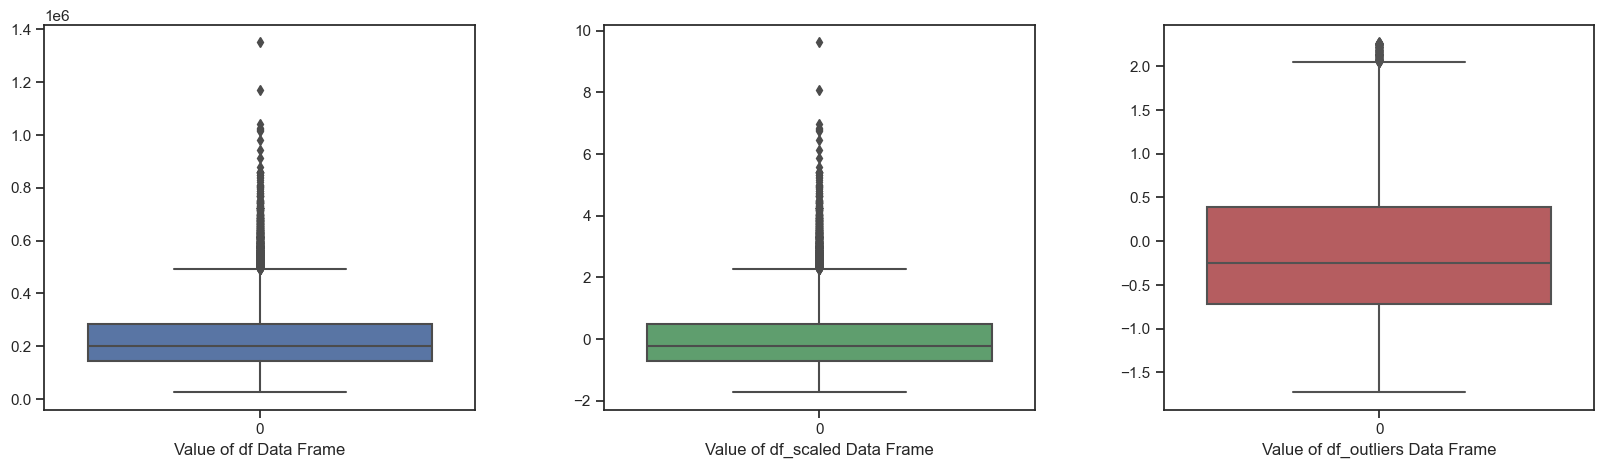

In [76]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

plt.subplots_adjust(wspace = 0.3) 

sns.boxplot(data = df['Value'], ax = ax[0], color = 'b',)
ax[0].set_xlabel('Value of df Data Frame')
 
sns.boxplot(data = df_scaled['Value_scaled'], ax = ax[1], color='g')
ax[1].set_xlabel('Value of df_scaled Data Frame')

sns.boxplot(data = df_outliers['Value_scaled'], ax = ax[2], color='r')
ax[2].set_xlabel('Value of df_outliers Data Frame')
    
plt.show()

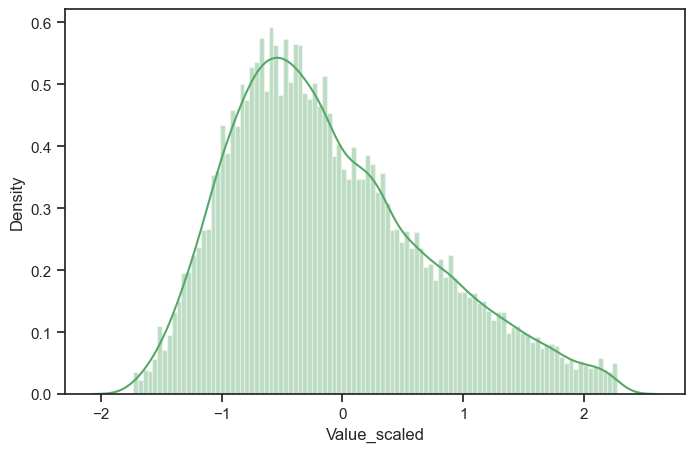

In [77]:
plt.figure(figsize = (8, 5))
sns.distplot(df_outliers['Value_scaled'], color='g', bins=100, hist_kws = {'alpha': 0.4});

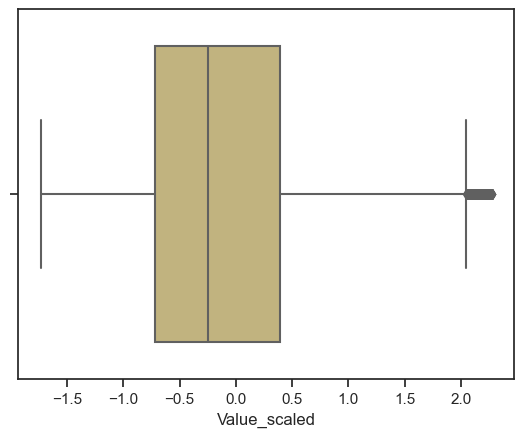

In [78]:
sns.boxplot(x = df_outliers['Value_scaled'], color="y")
plt.show()

## 3. Machine Learning

### 3.1 kNN Classification

"The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”
k-Neighbors classification
In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐ bor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point." (Müller and Guido, 2017, p.49)

This test below was learned from the second class, week 2, of the Machine Learning module at CCT College and also used the example from the book "`Müller, A.C. and Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. Beijing: O’reilly.`" to get a result. 

Creating a new data frame whose name is `df_ireland`

In [79]:
df_ireland = df_outliers.copy()

In [80]:
df_ireland.head(2)

,Month,Eircode,Value,Acronym,County,Sold,Dublin,County_Encoder,Value_scaled
0,2010 January,A41: Ballyboughal,322422.0,A41,Ballyboughal,1,0,0.0,0.815596
1,2010 January,A42: Garristown,322422.0,A42,Garristown,1,0,1.0,0.815596


Splitting the data for training and testing to use in the machine learning model algorithm 

- `X` - Storing the features 2 and 8 in this case: County_Encoder and Value_scaled and 
- `y` - Storing the Feature Sold 

In [81]:
X = df_ireland.iloc[:, [7,8]]
y = df_ireland.iloc[:, 5]

Import the function `train_test_split` from `sklearn`, and split the data to Train and Test with 20% of testing and random_state = 38 and 80% of the data to Train

In [82]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 38) 

Generating a KNN Model with 3 neighbours, also importing `KNeighborsClassifier` from `sklearn`, and training the model using `KNN.fit` next creating the variable `y_pred` to sabe the Predict value

In [83]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 3)

kNN.fit(X_train, y_train)

y_pred = kNN.predict(X_test)

Importing `metrics` from `sklearn` for get the `accuracy_score`, `precision_score` and `recall_score`, in this case, accuracy: **0.88**, precision: **0.54** and recall: **0.44**

In [84]:
from sklearn import metrics

print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

Accuracy: 0.88
Precision: 0.54
Recall: 0.44


Tested also with training splits (20%, 25% and 30%) and got similar results, such as described below: 

- 20% - Accuracy: 0.88, Precision: 0.54 and Recall: 0.44
- 25% - Accuracy: 0.88, Precision: 0.55 and Recall: 0.44
- 30% - Accuracy: 0.87, Precision: 0.55 and Recall: 0.45

In [85]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 38)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 38)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 38)

kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)

print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

Accuracy: 0.87
Precision: 0.55
Recall: 0.45


Next plotting a Confusion Matrix after importing `confusion_matrix` from `sklearn` and using the `KNN.predict` method to predict.

array([[5520,  349],
       [ 521,  421]])

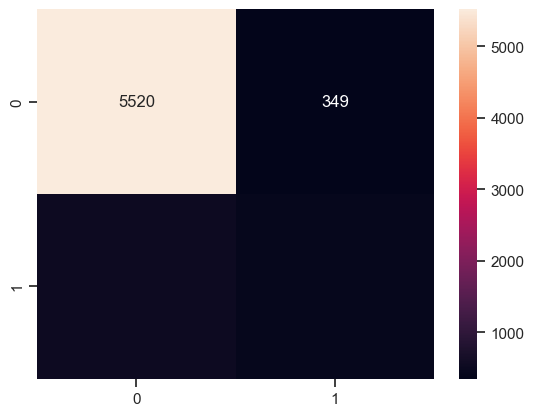

In [86]:
from sklearn.metrics import confusion_matrix

y_predict = kNN.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, fmt='d')
confusion_matrix(y_test, y_pred)

Next import `classification_report` from `sklearn` to show us the classification report

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5869
           1       0.55      0.45      0.49       942

    accuracy                           0.87      6811
   macro avg       0.73      0.69      0.71      6811
weighted avg       0.86      0.87      0.87      6811



##### Hyperparameters

The codes below for Hyperparameters aim to get the best results after training and testing the model on 10 different k-values.
Creating a variable `neighbors` that will have values, in this case, ranging from 1 to 5 and created two matrices whose name is `train_accuracy and test_accuracy` for training and testing accuracy for use in the next steps to ploot a graphic 

In [88]:
neighbors = np.arange(1, 5)                  
train_accuracy = np.zeros(len(neighbors))    
test_accuracy = np.zeros(len(neighbors))     

The for loop below enumerates all 5 neighbour values and for each prediction on training and testing after initialising the `KNeighborsClassifier` fit the model computes the accuracy on training and testing and saves the values in the matrices created before.

In [89]:
for i, k in enumerate(neighbors):
    kNN = KNeighborsClassifier(n_neighbors = k)  
    kNN.fit(X_train, y_train)
    train_accuracy[i] = kNN.score(X_train, y_train)
    test_accuracy[i] = kNN.score(X_test, y_test)

Next, show the result on the plot graphic for Testing Accuracy and Training Accuracy after the training and test, this is important to show which one is the best k-value that works better in the model.

"The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting (note that because considering fewer neighbors corresponds to a more complex model, the plot is horizontally flipped relative to the illustration in Figure 2-1)" (Müller and Guido, 2017, p.53).

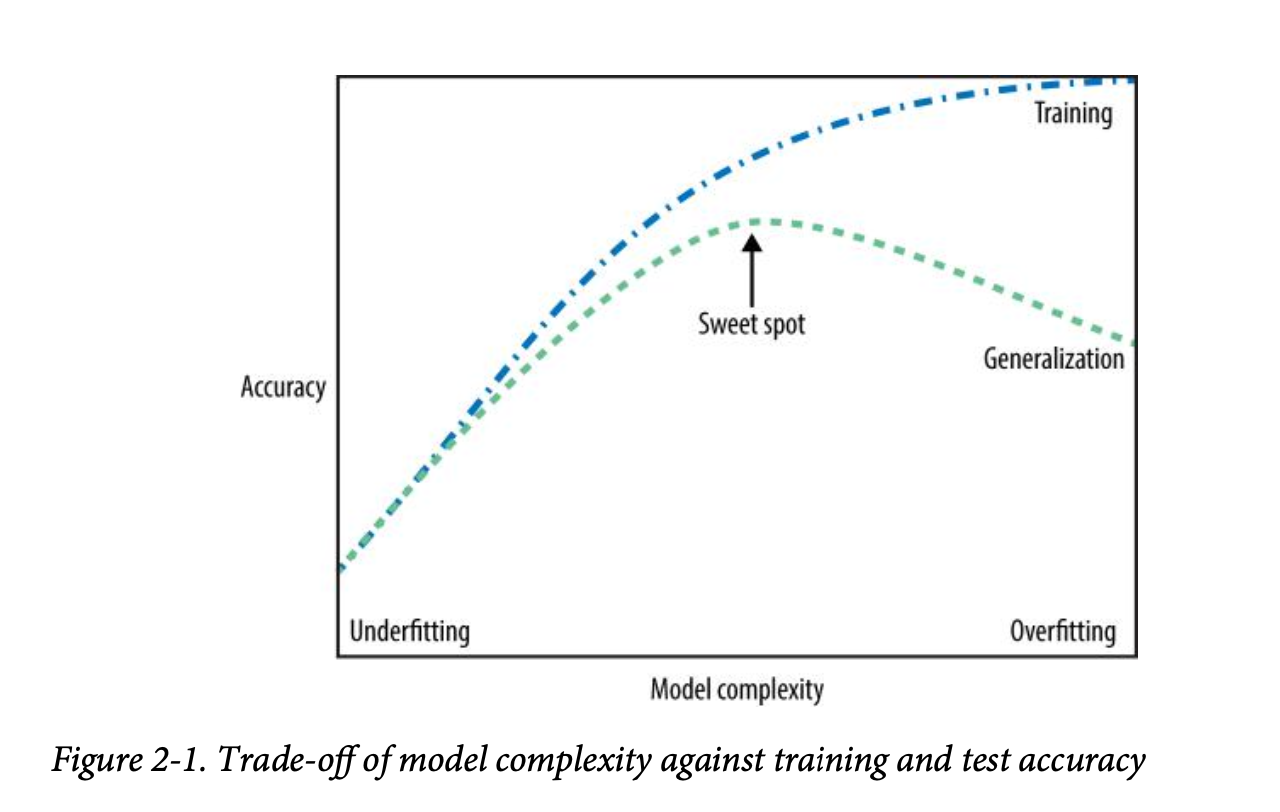

(Müller and Guido, 2017, p.43).

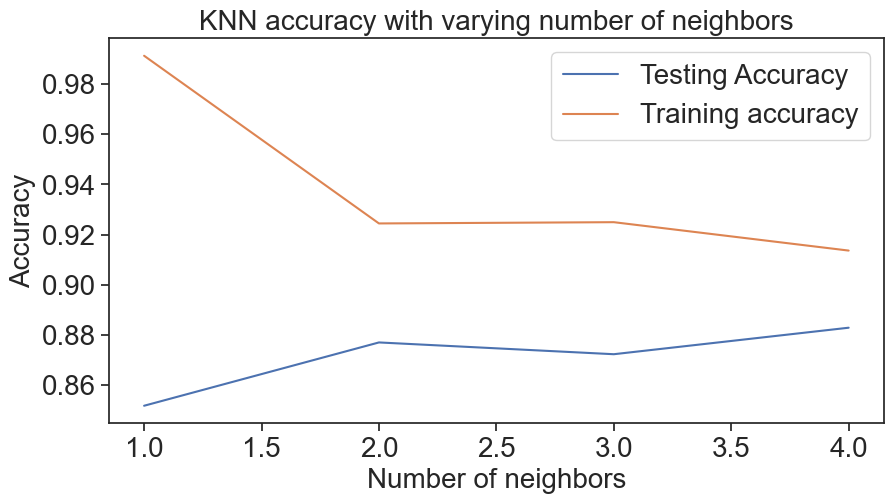

In [90]:
plt.figure(figsize = (10, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

Now using k-neighbors regression, used the plot graphic to see k-neighbors regression with 1 neighbors

"There is also a regression variant of the k-nearest neighbors algorithm. [...], let’s start by using the single nearest neighbor, this time using the wave dataset. We’ve added three test data points as green stars on the x-axis. The prediction using a single neighbor is just the target value of the nearest neighbor. These are shown as blue stars" below (Müller and Guido, 2017, p.54)

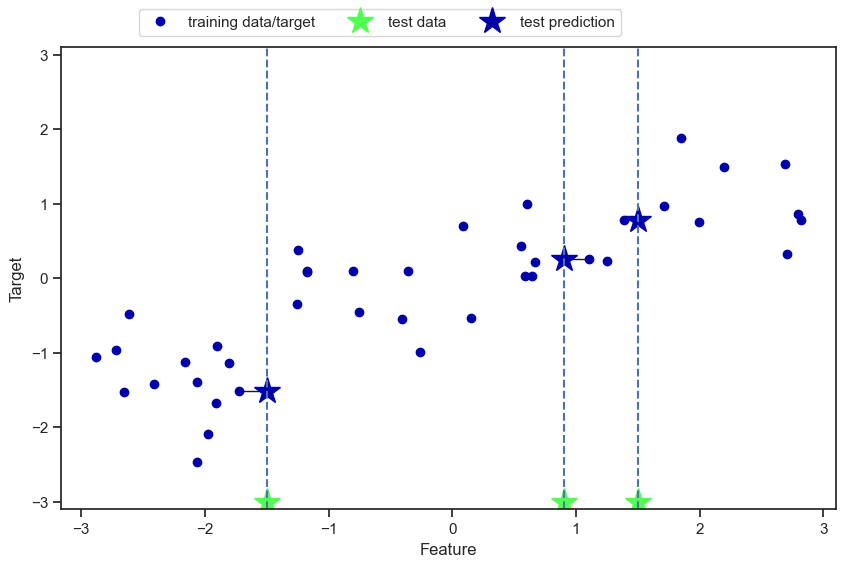

In [91]:
import mglearn 

mglearn.plots.plot_knn_regression(n_neighbors = 1)

Used the plot graphic to see k-neighbors regression with 5 neighbors

"Again, we can use more than the single closest neighbor for regression. When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors" (Müller and Guido, 2017, p.55)

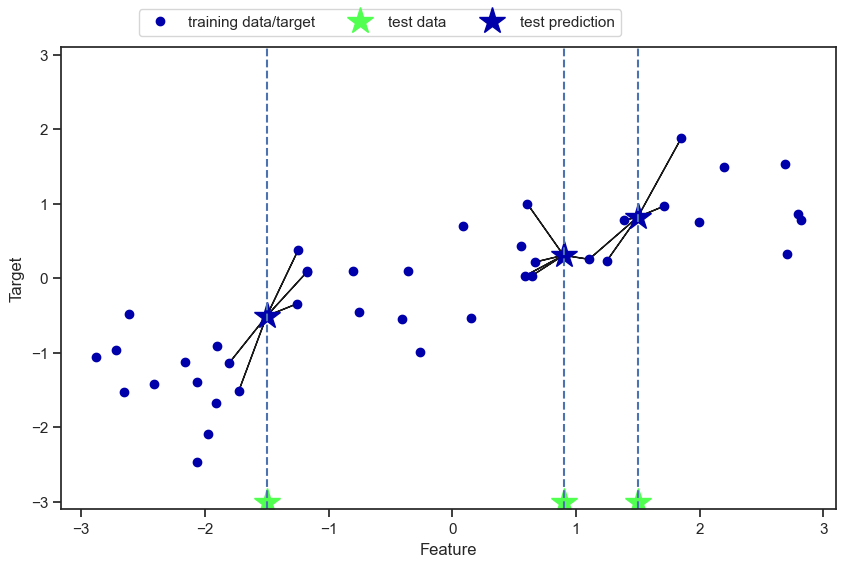

In [92]:
mglearn.plots.plot_knn_regression(n_neighbors = 5)

"The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn. It’s used similarly to KNeighborsClassifier:" (Müller and Guido, 2017, p.56) 

Using `X and y` to generate the data using `make_wave` function, next: "split the wave dataset into a training and a test set", "instantiate the model and set the number of neighbors to consider to 3" and "fit the model using the training data and training targets" (Müller and Guido, 2017, p.56)

In [93]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

"Now we can make predictions on the test set:" (Müller and Guido, 2017, p.56)
Print the predict of results for `X_test`

In [94]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


"We can also evaluate the model using the score method, which for regressors returns the R2 score. The R2 score, also known as the coefficient of determination, is a meas‐ ure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train:" (Müller and Guido, 2017, p.57)

In [95]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Got a score of 0.83, which indicates a relatively good model fit

Next Plotting using a scatter plot to see the houses sold in Ireland, also the `confusion_matrix`

In [96]:
X = df_ireland.iloc[:, [7,8]]
y = df_ireland.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

<Axes: xlabel='County_Encoder', ylabel='Value_scaled'>

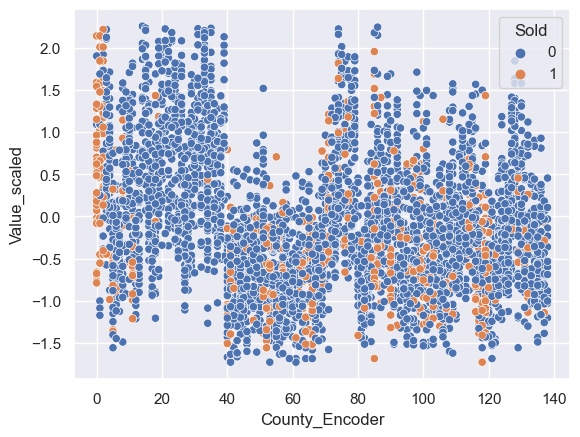

In [97]:
import seaborn as sns
sns.set()

sns.scatterplot(
    x = 'County_Encoder',
    y = 'Value_scaled',
    hue = 'Sold',
    data = X_test.join(y_test, how = 'outer')
)

In [98]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3701,  198],
       [ 351,  291]])

##### Dublin

Next doing the same: Plotting using a scatter plot to see the houses sold but in this case, just in Dublin, also the `confusion_matrix`.

In [99]:
df_dublin = df_ireland[df_ireland['Dublin'] == 1]

In [100]:
X = df_dublin.iloc[:, [7,8]]
y = df_dublin.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

<Axes: xlabel='County_Encoder', ylabel='Value_scaled'>

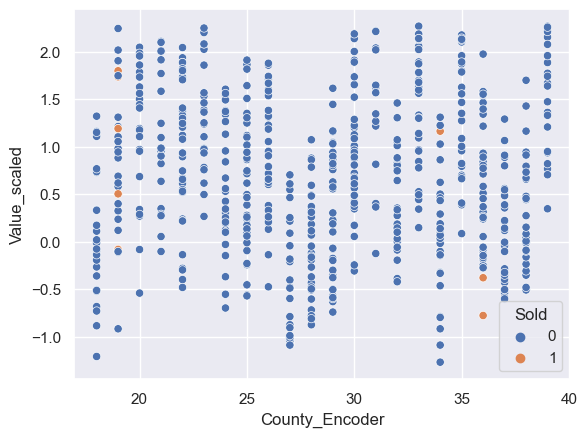

In [101]:
import seaborn as sns
sns.set()

sns.scatterplot(
    x = 'County_Encoder',
    y = 'Value_scaled',
    hue = 'Sold',
    data = X_test.join(y_test, how = 'outer')
)

### 3.2 Random Forest

"A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics." (Müller and Guido, 2017, p.97)

This test below was learned from the third class, week 3, of the Machine Learning module at CCT College and also used the example from the DataCamp website (Shafi, 2023) to get a result.

Splitting the data for training and testing to use in the machine learning model algorithm

X - Storing the features 2 and 8 in this case: County_Encoder and Value_scaled and
y - Storing the Feature Sold

Creating the variables `X_train, X_test, y_train and y_test`, for training and testing the model, chosen first with 20% of the data for testing with a set random_state = 32, to split random 32 by 32 and 80% of the data for training. 

80% Training, 20% Test

In [102]:
X = df_ireland.iloc[:, [7,8]]
y = df_ireland.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 32) 

Created a Gaussian Classifier with n_estimators = 100 and random_state = 32, next training the model using the training set 

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, random_state = 32)

clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

After printing how often the classifier is correct, in this case using 100 estimators 0.87
- Accuracy: **0.87**, precision: **0.54** and recall: **0.40**

In [104]:
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

Accuracy: 0.87
Precision: 0.54
Recall: 0.40


In [105]:
X = df_ireland.iloc[:, [7,8]]
y = df_ireland.iloc[:, 5]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 32)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 32)

clf_RF = RandomForestClassifier(n_estimators = 100, random_state = 32)
clf_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)

print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

Accuracy: 0.87
Precision: 0.55
Recall: 0.40


Tested also with training splits (20%, 25% and 30%) and got similar results, such as described below: 

- 20% - Accuracy: 0.87, Precision: 0.54 and Recall: 0.40
- 25% - Accuracy: 0.87, Precision: 0.52 and Recall: 0.40
- 30% - Accuracy: 0.87, Precision: 0.55 and Recall: 0.40

array([[5556,  309],
       [ 572,  374]])

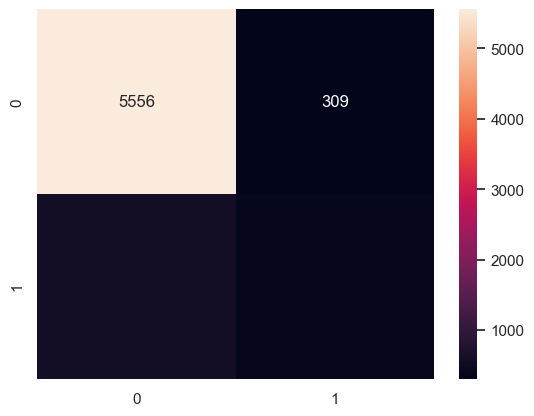

In [106]:
y_predict = clf_RF.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, fmt='d')
confusion_matrix(y_test, y_pred)

In [107]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5865
           1       0.55      0.40      0.46       946

    accuracy                           0.87      6811
   macro avg       0.73      0.67      0.69      6811
weighted avg       0.86      0.87      0.86      6811



### 3.3 Decision Trees

"Decision trees are widely used models for classification and regression tasks. Essen‐ tially, they learn a hierarchy of if/else questions, leading to a decision." (Müller and Guido, 2017, p.84)

This test below was learned from the third class, week 3, of the Machine Learning module at CCT College and also used the book "`Müller, A.C. and Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. Beijing: O’reilly.`" to get a result.

Splitting the data for training and testing to use in the machine learning model algorithm

- X - Storing the features 2 and 8 in this case: County_Encoder and Value_scaled and 
- y - Storing the Feature Sold

Creating the variables X_train, X_test, y_train and y_test, for training and testing the model, chosen first with 20% of the data for testing with a set random_state = 32, to split random 32 by 32 and 80% of the data for training.

80% Training, 20% Test

In [108]:
X = df_ireland.iloc[:, [7,8]]
y = df_ireland.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 32) 

Created a Decision Tree classifier object with `criterion = gini, max_depth = 3 and random_state = 32`, next training the Decision Tree Classifier and predicting the response for the test

In [109]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 32)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

After printing how often the classifier is correct, in this case 0.87
- Accuracy: 0.87, precision: 0.79 and recall: 0.10

In [110]:
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

Accuracy: 0.87
Precision: 0.78
Recall: 0.11


In [111]:
X = df_ireland.iloc[:, [7,8]]
y = df_ireland.iloc[:, 5]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 32)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 32)

clf = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )
print("Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)) )
print("Recall: {:.2f}".format(metrics.recall_score(y_test, y_pred)) )

Accuracy: 0.87
Precision: 0.79
Recall: 0.10


Tested also with training splits (20%, 25% and 30%) and got similar results, such as described below:

- 20% - Accuracy: 0.87, Precision: 0.78 and Recall: 0.11
- 25% - Accuracy: 0.88, Precision: 0.80 and Recall: 0.12
- 30% - Accuracy: 0.87, Precision: 0.79 and Recall: 0.10

array([[5840,   25],
       [ 850,   96]])

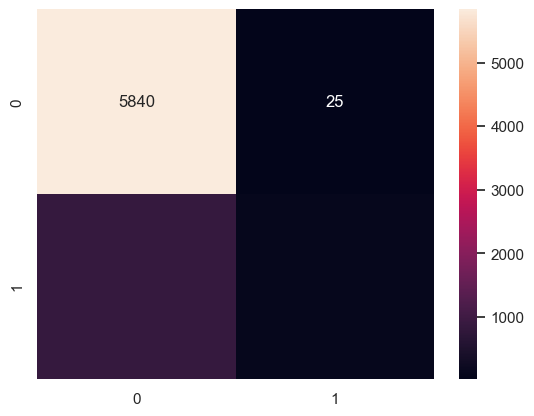

In [112]:
y_predict = clf.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, fmt='d')
confusion_matrix(y_test, y_pred)

In [113]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5865
           1       0.79      0.10      0.18       946

    accuracy                           0.87      6811
   macro avg       0.83      0.55      0.56      6811
weighted avg       0.86      0.87      0.83      6811



Next plotting a tree to get three nodes as determined before in max_depth = 3 from the Decision Tree

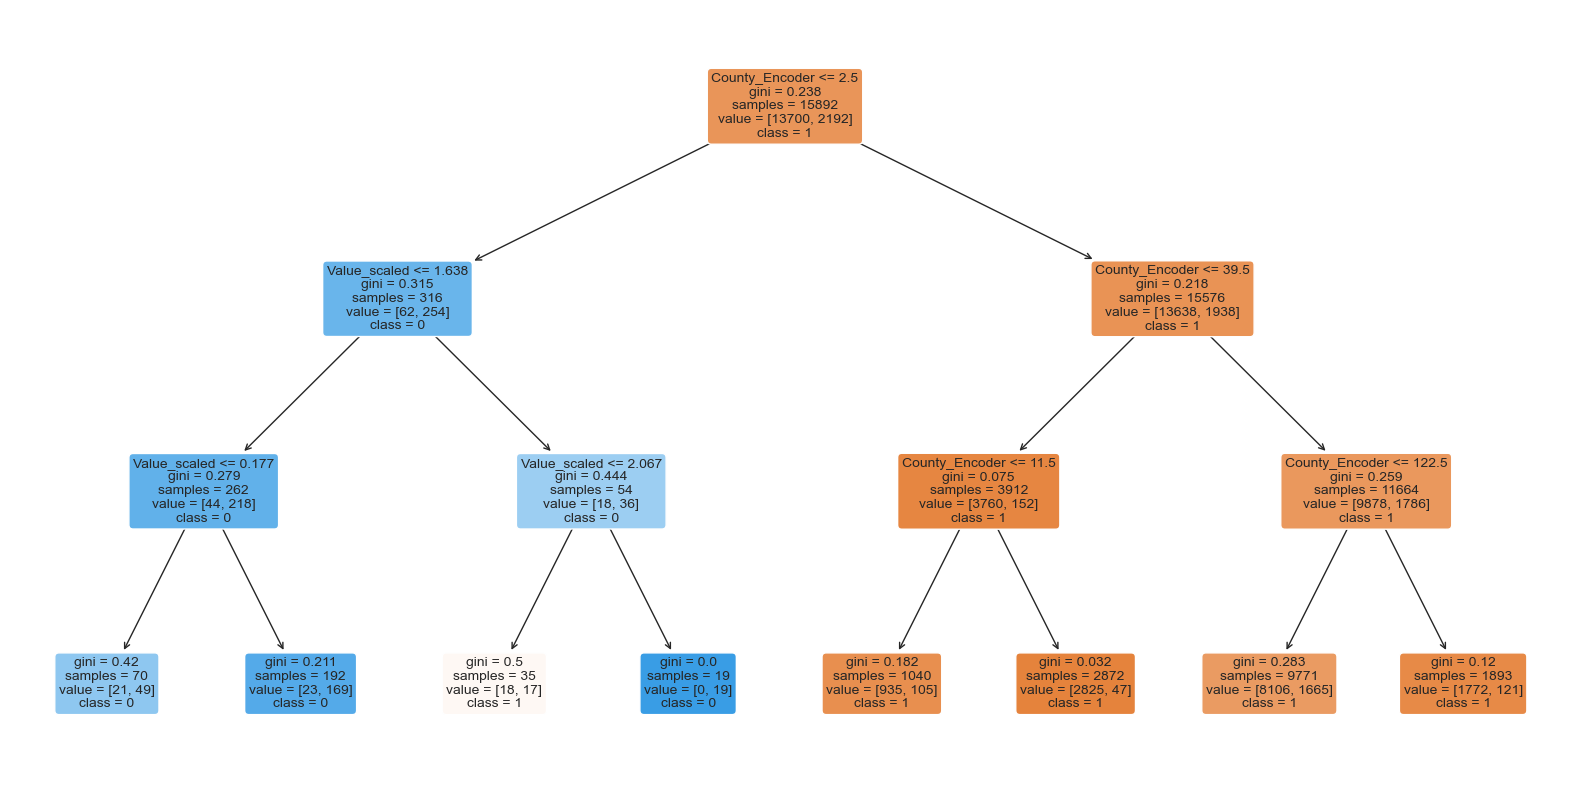

In [114]:
from sklearn.tree import plot_tree  
plt.figure(figsize = (20, 10))
plot_tree(clf, filled = True, feature_names = X.columns.tolist(), class_names = [str(label) for label in df_ireland['Sold'].unique()], rounded = True, fontsize = 10)
plt.show()

### 3.4 Linear Regression

Splitting the data for training and testing to use in the machine learning model algorithm

X - Storing the features 2 and 8 in this case: County_Encoder and Value_scaled and
y - Storing the Feature Sold
Creating the variables X_train, X_test, y_train and y_test, for training and testing the model, chosen first with 20% of the data for testing with a set random_state = 32, to split random 32 by 32 and 80% of the data for training.

80% Training, 20% Test

Creating a new feature whose name is `Sales` just to test the `Linear Regression` algorithm in another perspective with random numbers from your choice, but remember to update the y split value, instead of 5 from the Sold feature, change to 9 from the Sales feature.

Using `numpy.random.randint` to create random numbers between 0 to 5 and it will "Return random integers from low (inclusive) to high (exclusive)." (NumPy Developers, 2024a)

In [115]:
df_dublin['Sales'] = df_dublin['Sold'].apply(lambda x: (np.random.randint(0, 5)) if 1 else 0)

In [116]:
df_dublin.columns

Index(['Month', 'Eircode', 'Value', 'Acronym', 'County', 'Sold', 'Dublin',
       'County_Encoder', 'Value_scaled', 'Sales'],
      dtype='object')

In [117]:
X = df_dublin.iloc[:, [7,8]]
y = df_dublin.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2 , random_state = 32)

Importing `LinearRegression` from `sklearn` and creating a Linear Regression Object next fitting the model

In [118]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

Intercept and coefficients, where y = 0.0722 + (-0.0016) x Price

In [119]:
print(lr.intercept_)
print(lr.coef_)

0.07225566295545252
[-0.00164686 -0.00335004]


Next making predictions on the testing set

In [120]:
y_pred = lr.predict(X_test)
type(y_pred)

numpy.ndarray

Computing RMSE and R^2 Values

Text(0, 0.5, 'Price')

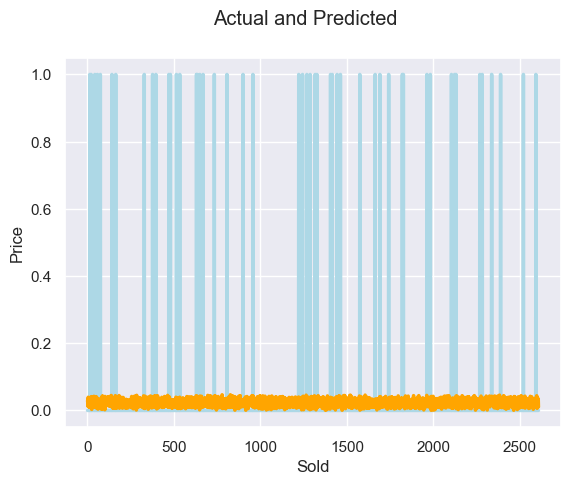

In [121]:
import matplotlib.pyplot as plt
c = [i for i in range(1,2609,1)]     
fig = plt.figure()
plt.plot(c,y_test, color = "lightblue", linewidth = 2.5, linestyle = "-")
plt.plot(c,y_pred, color = "orange", linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted')           
plt.xlabel('Sold')                            
plt.ylabel('Price')                  

Error terms

Text(0, 0.5, 'ytest-ypred')

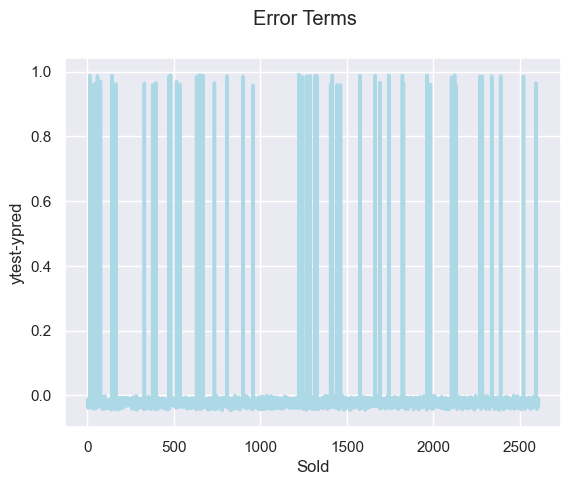

In [122]:
c = [i for i in range(1,2609,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color = "lightblue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms')     
plt.xlabel('Sold')                
plt.ylabel('ytest-ypred')       

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.018913637109493044
r_square_value : -0.005818644540288798


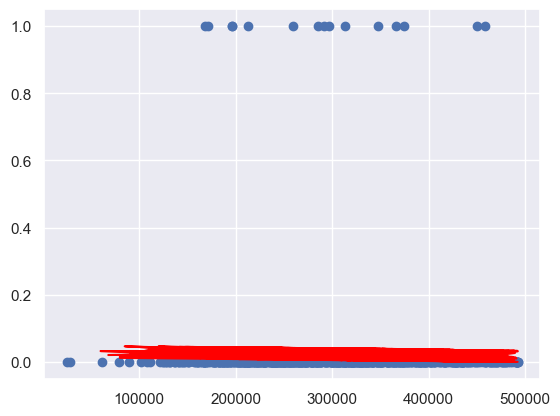

In [124]:
X = df_dublin.iloc[:, [2]]
y = df_dublin.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2 , random_state = 32)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

#### 3.4.1 Linear Regression Hypothesis

Create a new feature whose name is "Desired_Value" in the data frame `df_dublin` to save a random percentage of prices to simulate a Desired Value Price for each property.

Using `numpy.random.uniform` to get a random number between 0.5 to 0.25 "Draw samples from a uniform distribution." (NumPy Developers, 2024b)

In [125]:
df_dublin["Desired_Value"] = df_dublin["Value"] +  df_dublin["Value"].apply(lambda x: np.random.uniform(0.5, 0.25) * x)

In [126]:
X = df_dublin.iloc[:, [2]]
y = df_dublin.iloc[:, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Method to calculate the score

In [127]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring = 'r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

Train the model and Calculate the mean values and Standard deviation

In [128]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train, y_train)

get_cv_scores(lr)

CV Mean:  0.9691257817755282
STD:  0.0031116654659738546




Calculate the intercept and coefficient


In [129]:
print(lr.intercept_)
print(lr.coef_)

-917.1992392527172
[1.37800426]


In [130]:
y_pred = lr.predict(X_test)

Getting the scatter plot 

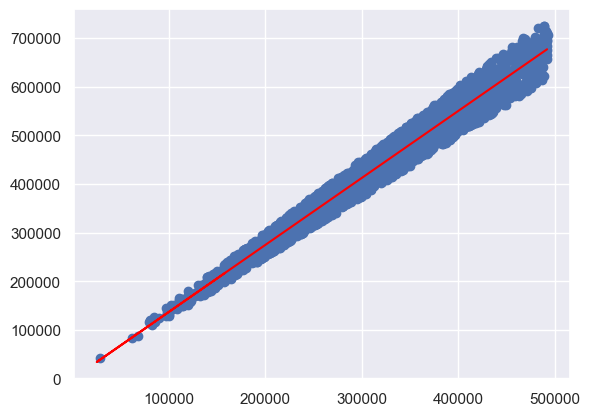

In [131]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

Creating a new data frame whose name is df_predict to save the actual price and predicted

In [132]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head()

,Actual,Predicted
15865,730829.467063,677082.943003
9766,232674.873978,236788.534999
18942,539566.177345,508231.947447
17551,333268.033364,360366.578713
13227,555661.726338,601685.440112


### 3.5 K-Means

Getting a histplot of the Frequency of Properties in Dublin per Neighborhood

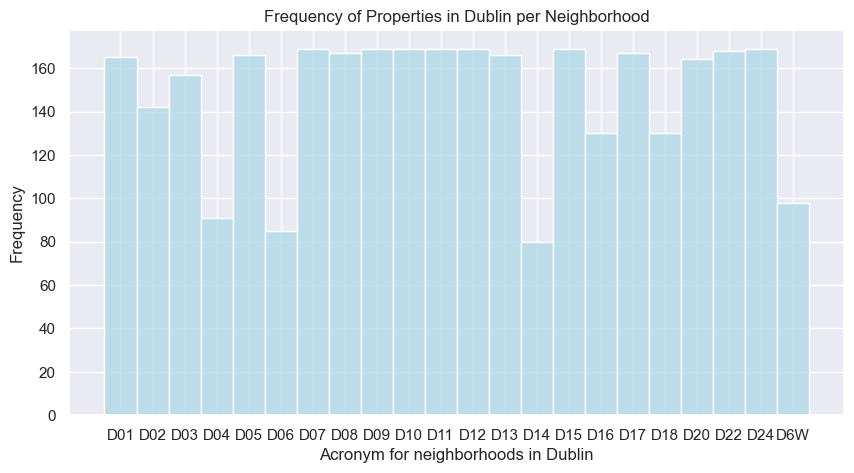

In [133]:
plt.figure(figsize = (10, 5))
sns.histplot(data = df_dublin, x = 'Acronym', color = 'lightblue')
plt.title("Frequency of Properties in Dublin per Neighborhood")
plt.xlabel('Acronym for neighborhoods in Dublin');
plt.ylabel('Frequency')
plt.show()

In [134]:
df_dublin.head(2)

,Month,Eircode,Value,Acronym,County,Sold,Dublin,County_Encoder,Value_scaled,Sales,Desired_Value
18,2010 January,D01: Dublin 1,212500.0,D01,Dublin 1,0,1,18.0,-0.125834,4,268185.431563
19,2010 January,D02: Dublin 2,232688.0,D02,Dublin 2,0,1,19.0,0.047067,4,343778.470924


In [135]:
# pip install mglearn

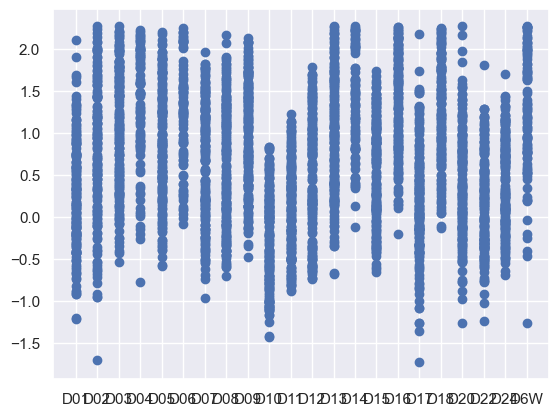

In [136]:
plt.scatter(df_dublin['Acronym'], df_dublin['Value_scaled'])
plt.title('')
plt.show()

In [137]:
from sklearn.cluster import KMeans
kmeans_seeds = KMeans(n_clusters = 3)
kmeans_seeds.fit(df_dublin.select_dtypes(include = ['number'])) 
C = kmeans_seeds.labels_
C.shape
assign_seeds = C.reshape(-1, 1)

In [138]:
X1 = df_dublin['Acronym']
X2 = df_dublin['Value_scaled']

X11 = X1[:, ]
X22 = X2[:, ]

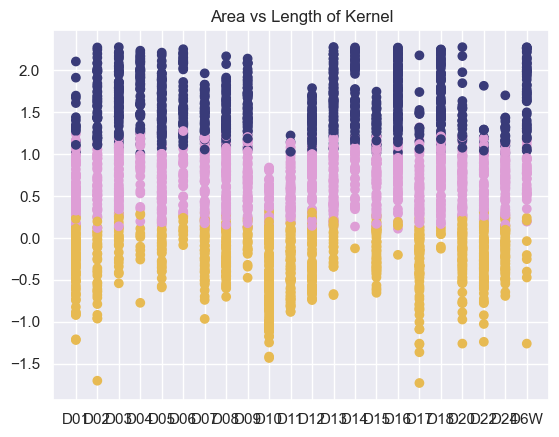

In [139]:
plt.scatter(X11, X22, c = assign_seeds, cmap = 'tab20b')
plt.title('Area vs Length of Kernel')
plt.show()

### 3.6 Tune Hyperparameters with GridSearchCV

#### 3.6.1 Cross-Validation

Importing `cross_val_score` and `KFold` from `sklearn`, splitting the data in X and y, creating a linear regression model, setting up k-fold cross-validation, performing cross-validation and getting R2 scores, using a for loop to print the R2 scores for each fold and next print the average R2 score across all folds.

In [140]:
from sklearn.model_selection import cross_val_score, KFold

X = df_ireland.iloc[:, [7,8]]
y = df_ireland.iloc[:, 5]

linear_model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='r2')

for i, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {i}: R2 Score = {score}")

average_r2 = np.mean(cross_val_scores)
print(f"\nAverage R2 Score: {average_r2}")

Fold 1: R2 Score = 0.0065503952365250084
Fold 2: R2 Score = 0.011214924188233555
Fold 3: R2 Score = 0.003982941438877674
Fold 4: R2 Score = 0.0036515119062437984
Fold 5: R2 Score = 0.009529201504550056

Average R2 Score: 0.006985794854886018


#### 3.6.2 GridSearchCV

Using an example of GridSearchCV from the website analyticsvidhya.com, learning: Tune Hyperparameters with GridSearchCV. 

"GridSearchCV acts as a valuable tool for identifying the optimal parameters for a machine learning model." (Shah, 2021)

"In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

The most popular type of Cross-validation is K-fold Cross-Validation. It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. Thus, it is also a time-consuming process." (Shah, 2021) 

Specifying Independent and Dependent Variables and splitting the data into train and test set

In [141]:
X = df_ireland.iloc[:, [7,8]]
y = df_ireland.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32) 

Building Random Forest Classifier, Here, we created the object rfc of RandomForestClassifier().

In [142]:
rfc = RandomForestClassifier()

Initializing GridSearchCV() object and fitting it with hyperparameters

In [143]:
from sklearn.model_selection import GridSearchCV

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

Here, we passed the estimator object rfc, param_grid as forest_params, cv = 5 and scoring method as accuracy in to GridSearchCV() as arguments.

Getting the Best Hyperparameters

In [144]:
print(clf.best_params_)

{'max_depth': 12, 'max_features': 10}


In [145]:
print(clf.best_score_)

0.8870160428066789


---

## Conclusions

After finishing all analyses, understanding the chosen data dealt with the EDA data preparation by finding unique values, replacing values, dropping irrelevant columns and renaming, handling missing values, creating hypotheses for machine learning algorithms, checking duplicated, type of conversion, relationships between the features, statical analyses, encoding values, scaled the numeric values and dealt with outliers, the data it was ready to use in Machine Learn models.

 It was chosen some machine learning algorithms to tested such as KNN Classification, Random Forest and Decision Trees, once this data is not large enough to use PCA and try to predict with machine learning algorithms should be good to be used, the models chosen show us a good performance with good results in Accuracy, Precision and Recall, also used Linear Regression to predict values and next created one hypothesis to predict a get new house price. Also used K-Means with three clusters as a test and used Cross Validation with KFlod and GridSearch CV algorithms getting a good score as a result. 



---

## Data Dictionary

**Statistic_Label**
- Mean Sale Price: Mean Sale Price (Euro)

**Month**
- Rage from 2010 January to 2024 January

**Dwelling Status -> Dwelling_Status**
- All Dwelling Statuses

**Eircode Output -> Eircode**
- Eircodes

**Stamp Duty Event** 
- Executions

**Type of Buyer -> Type_Buyer** 
- Household Buyer - First-Time Buyer Owner-Occupier

**UNIT**
- Euro

**VALUE -> Value**
Price of the property

---
**New Columns**
- **Acronym** County Acronym
- **County** County Name
- **Eir_encoder** Eircodes encoded 

---

## References

Central Statistics Office (2024). Data Residential Property Price Index December 2023 - Central Statistics Office. [online] www.cso.ie. Available at: https://www.cso.ie/en/releasesandpublications/ep/p-rppi/residentialpropertypriceindexdecember2023/data/ [Accessed 16 Apr. 2024].

Cereniyim (2019). Distribution plot with mean and median. [online] GitHub Gist. Available at: https://gist.github.com/cereniyim/df1c8646411cc34eb9720a79400a200f [Accessed 14 Apr. 2024].

Data to Fish (2024). 5 ways to apply an IF condition in Pandas DataFrame - Data to Fish. [online] datatofish.com. Available at: https://datatofish.com/if-condition-in-pandas-dataframe/.

Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Beijing: O’reilly.

NumPy Developers (2024a). numpy.random.randint — NumPy v1.20 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html.

NumPy Developers (2024b). numpy.random.uniform — NumPy v1.22 Manual. [online] numpy.org. Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html.

Sanchhaya Education Private Limited, G. (2021). Select rows that contain specific text using Pandas. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/ [Accessed 19 Apr. 2024].

Shah, R. (2021). GridSearchCV |Tune Hyperparameters with GridSearchCV. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/.

The Matplotlib Development Team (2024). matplotlib.pyplot.axvline — Matplotlib 3.8.4 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html#matplotlib.pyplot.axvline [Accessed 14 Apr. 2024].

The Pandas Development Team (2024a). pandas.DataFrame.isna — pandas 1.3.2 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html.

The Pandas Development Team (2024b). pandas.DataFrame.value_counts — pandas 2.1.0 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts.

The Pandas Development Team (2024c). pandas.isnull — pandas 2.2.2 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html.

The Pandas Development Team (2024d). pandas.Series.str.split — pandas 1.3.0 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html.